# Ketamine VR5 Stats, Plots - COLOCALIZED DATA ONLY
#### Jonathan Ramos 2/6/2024

Plotting data and running normality tests is annoying in prism. We have 28 stain type combinations to consider as well which makes this process unnecessarily very tedious. In this notebook I'll just quickly do some exploratory analyses of the normalized adjusted mean-background data we generated in our previous notbook.

In particular, in this notebook I plan to focus on:
- generating histograms
- generating QQ plots
- running some normalit tests (probably just Shapiro-Wilk)

In [1]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro 
from scipy.stats import lognorm

plt.rcParams.update({'figure.max_open_warning': 0})

/var/folders/b2/3h2lpxx14kgb12pp_7pltxnc0000gn/T/ipykernel_5120/536631275.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# load data
files = sorted(glob.glob('normalized adjusted mean-background/NORM/*.csv'))
dfs = [pd.read_csv(f) for f in files]

# let's take a look!
dfs[0].head(9)

Unnamed: 0  index      rat_n treatment stain_type      coloc_stain_type  \
0        5526  14487  KET-10-12   FR1_KET      Npas4  Npas4_coloc_w_PV,WFA   
1        5527  14488  KET-10-12   FR1_KET      Npas4  Npas4_coloc_w_PV,WFA   
2        5528  14489  KET-10-12   FR1_KET      Npas4  Npas4_coloc_w_PV,WFA   
3        5529  14490  KET-10-12   FR1_KET      Npas4  Npas4_coloc_w_PV,WFA   
4        5530  14491  KET-10-12   FR1_KET      Npas4  Npas4_coloc_w_PV,WFA   
5        5544  14555  KET-10-12   FR1_KET      Npas4  Npas4_coloc_w_PV,WFA   
6        5545  14556  KET-10-12   FR1_KET      Npas4  Npas4_coloc_w_PV,WFA   
7        5546  14557  KET-10-12   FR1_KET      Npas4  Npas4_coloc_w_PV,WFA   
8        5547  14558  KET-10-12   FR1_KET      Npas4  Npas4_coloc_w_PV,WFA   

                    filename           image_name   CoM_x   CoM_y  \
0  KET-10-12_PFC_3.7_A_4.tif  KET-10-12_PFC_3.7_A  170.95  312.57   
1  KET-10-12_PFC_3.7_A_4.tif  KET-10-12_PFC_3.7_A   36.62  458.40   
2  KET-10-12_PFC_3.7_A_4.tif  KET-10-12_PFC_3.7_A  306.85  306.78   
3  KET-10-12_PFC_3.7_A_4.tif  KET-10-12_PFC_3.7_A  154.15  476.33   
4  KET-10-12_PFC_3.7_A_4.tif  KET-10-12_PFC_3.7_A  299.44  422.83   
5  KET-10-12_PFC_3.7_B_4.tif  KET-10-12_PFC_3.7_B  354.26   78.17   
6  KET-10-12_PFC_3.7_B_4.tif  KET-10-12_PFC_3.7_B  429.88  365.95   
7  KET-10-12_PFC_3.7_B_4.tif  KET-10-12_PFC_3.7_B  305.49  492.30   
8  KET-10-12_PFC_3.7_B_4.tif  KET-10-12_PFC_3.7_B  146.83  485.75   

   mean_intensity  background       snr  \
0        503.0890    573.9955  0.876469   
1        471.7593    573.9955  0.821887   
2        485.9018    573.9955  0.846526   
3        524.3108    573.9955  0.913441   
4        544.4831    573.9955  0.948584   
5        493.5040    591.0376  0.834979   
6        586.1046    591.0376  0.991654   
7        582.2947    591.0376  0.985208   
8        507.1195    591.0376  0.858016   

                               coloc_roi_id_grouping  roi_id_grouping_counts  \
0  ('0-000-00008_PV', '0-FFF-00002_WFA', '0-FFF-0...                       3   
1  ('0-000-00005_PV', '0-FFF-00006_WFA', '0-FFF-0...                       3   
2  ('0-000-00003_PV', '0-FFF-00003_WFA', '0-FFF-0...                       3   
3  ('0-000-00002_PV', '0-FFF-00005_WFA', '0-FFF-0...                       3   
4  ('0-000-00000_PV', '0-FFF-00004_WFA', '0-FFF-0...                       3   
5  ('0-000-00010_PV', '0-FFF-00002_WFA', '0-FFF-0...                       3   
6  ('0-000-00007_PV', '0-FFF-00007_WFA', '0-FFF-0...                       3   
7  ('0-000-00001_PV', '0-FFF-00008_WFA', '0-FFF-0...                       3   
8  ('0-000-00000_PV', '0-FFF-00009_WFA', '0-FFF-0...                       3   

   mean-background  adjusted_mean-background  norm_adjusted_mean-background  
0       -70.906494                 96.585815                       0.684314  
1      -102.236176                 65.256134                       0.462342  
2       -88.093690                 79.398620                       0.562542  
3       -49.684692                117.807620                       0.834672  
4       -29.512390                137.979920                       0.977593  
5       -97.533600                 69.958710                       0.495660  
6        -4.932983                162.559330                       1.151739  
7        -8.742920                158.749390                       1.124746  
8       -83.918090                 83.574220                       0.592127

# Visualizing distributions

In [3]:
def plot_dist(df):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    f.suptitle(df.coloc_stain_type.unique().item(), fontsize=24)
    ax = ax.flatten()
    sns.histplot(ax=ax[0], data=df, x='norm_adjusted_mean-background', hue='treatment', binwidth=0.1, palette='pastel')
    sns.boxplot(ax=ax[1], data=df, x='norm_adjusted_mean-background', hue='treatment', gap=0.1, palette='pastel')

def plot_qq(df):
    f, ax = plt.subplots(nrows=2, ncols=2, figsize=(9,8))
    f.suptitle(df.coloc_stain_type.unique().item(), fontsize=24)
    ax = ax.flatten()
    for i, tx in enumerate(df.treatment.unique()):
        qqplot(df[df.treatment == tx]['norm_adjusted_mean-background'], line='s', ax=ax[i])
        ax[i].set_title(tx, fontsize=16)
    plt.tight_layout()

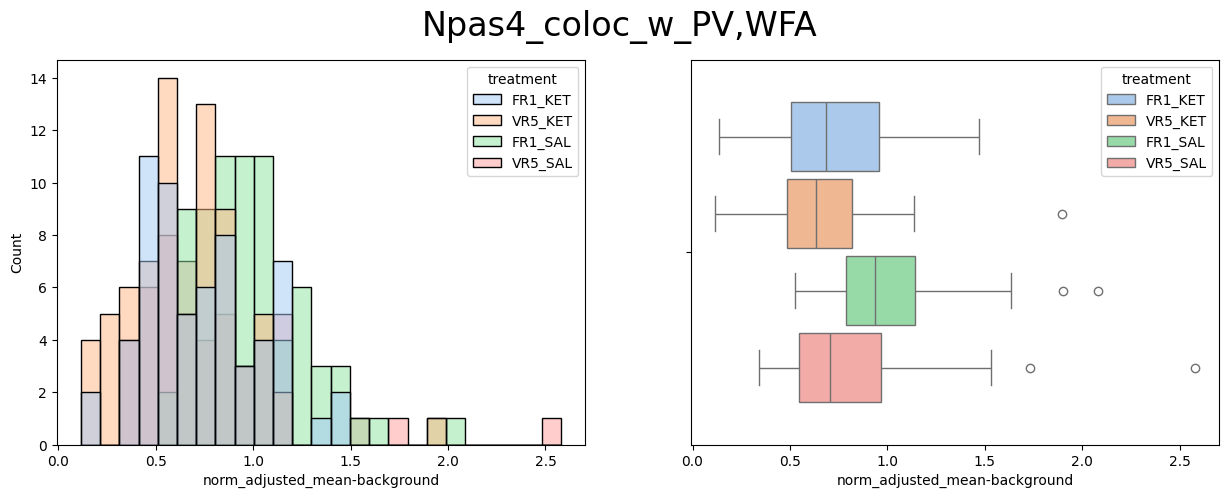

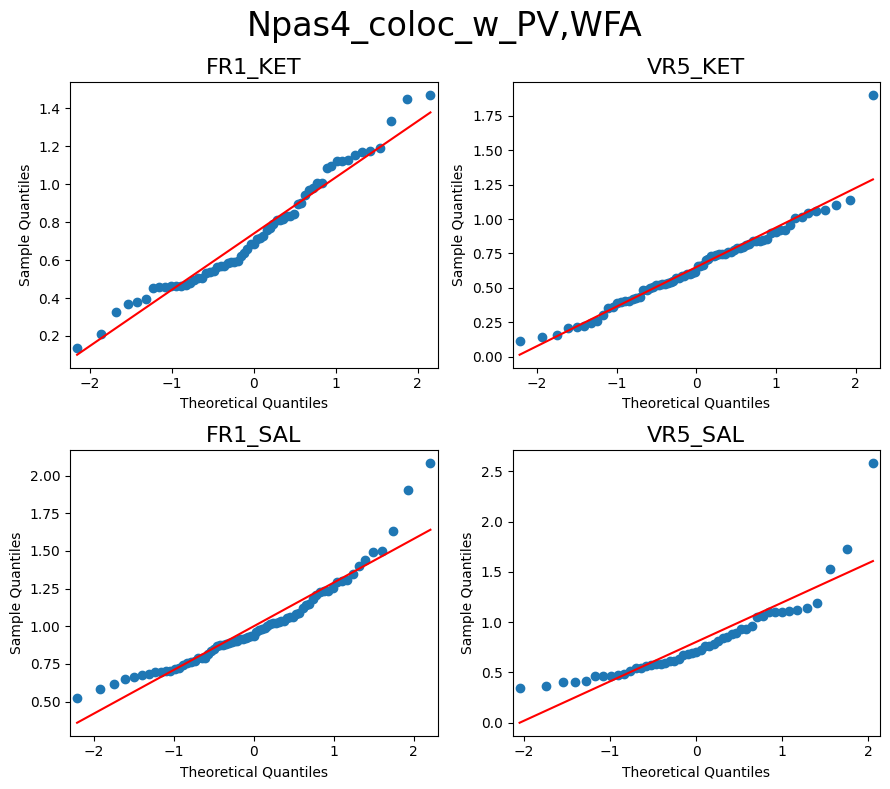

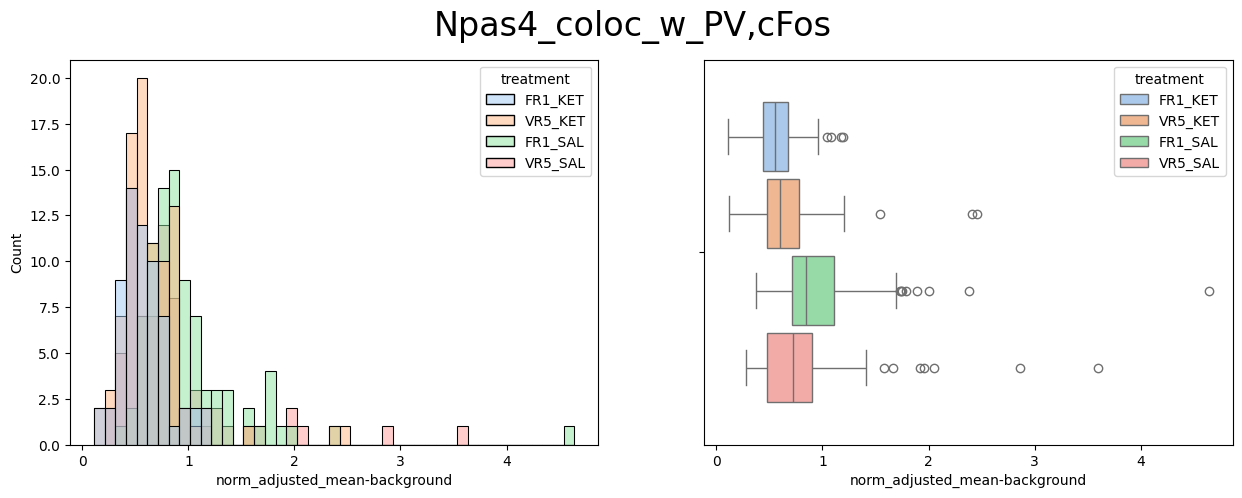

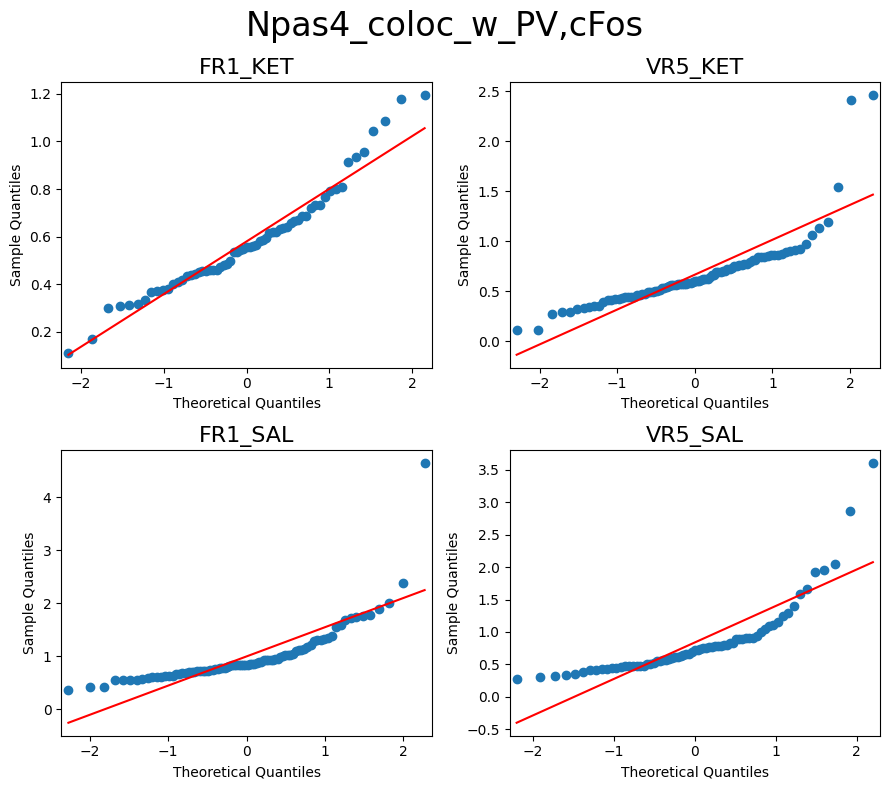

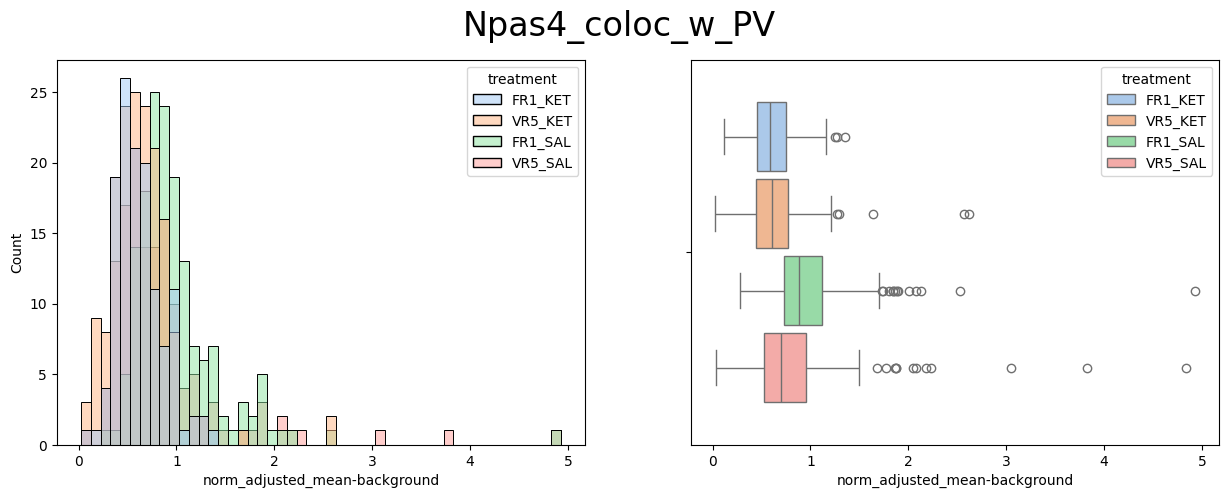

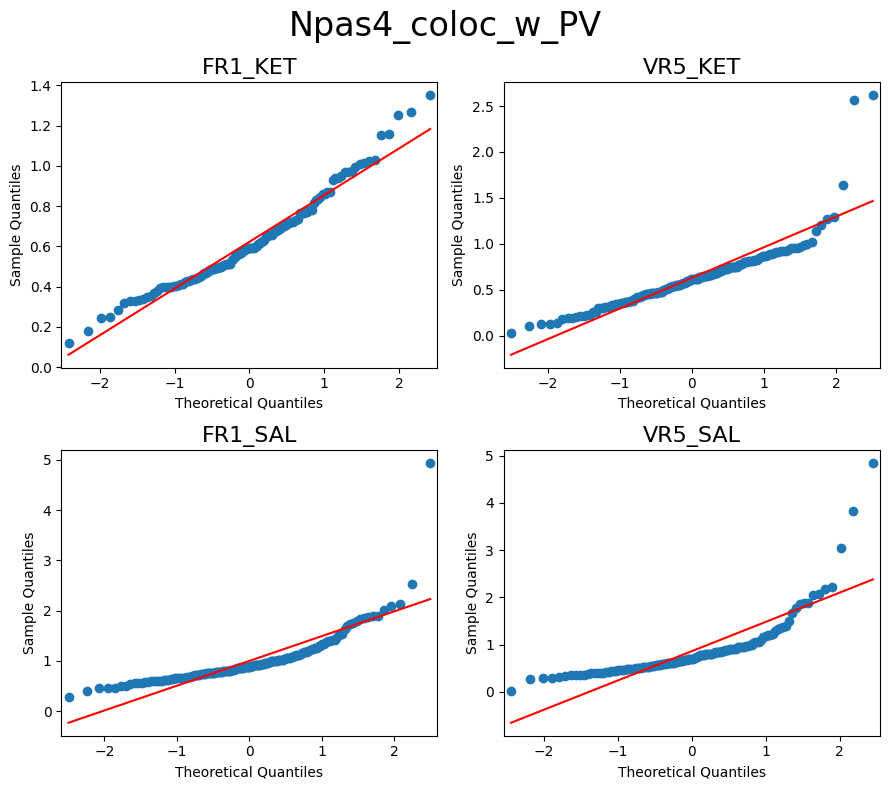

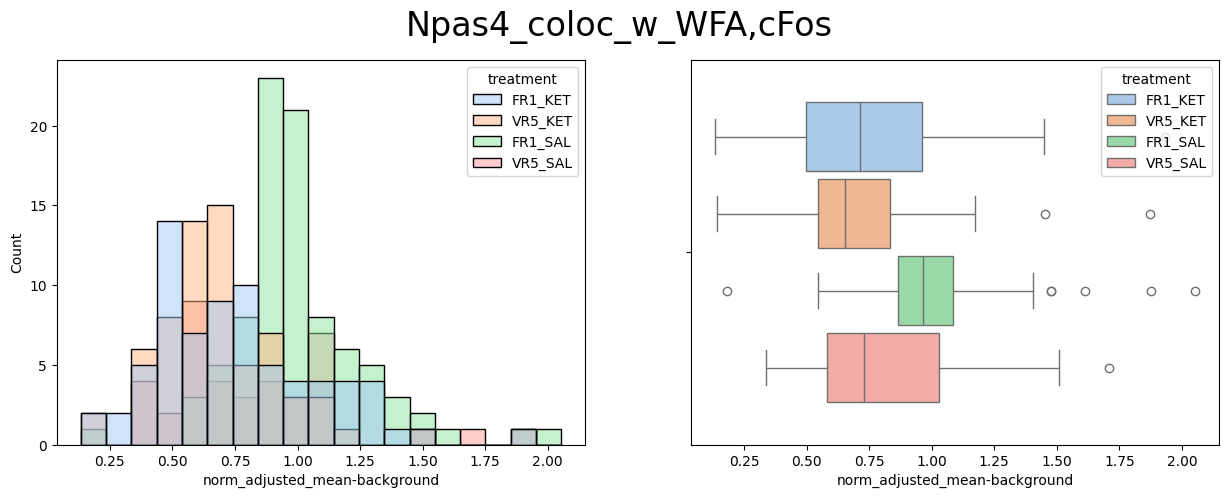

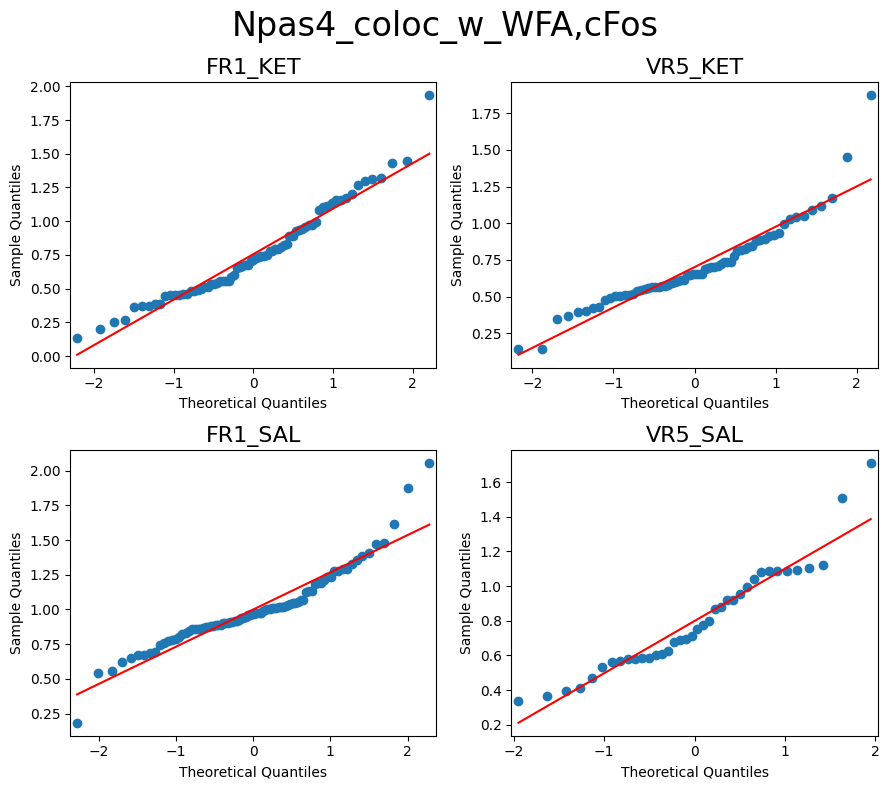

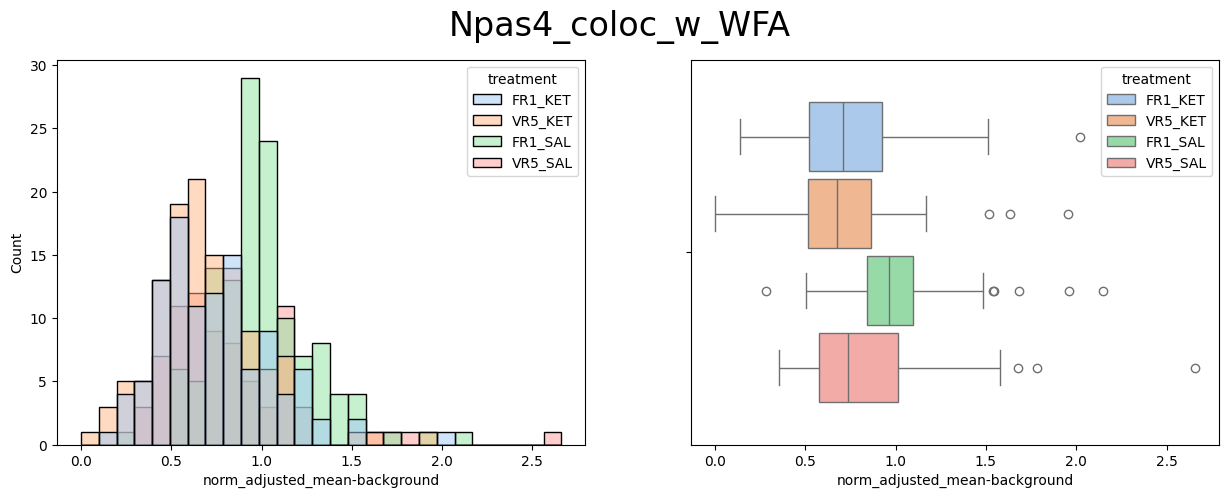

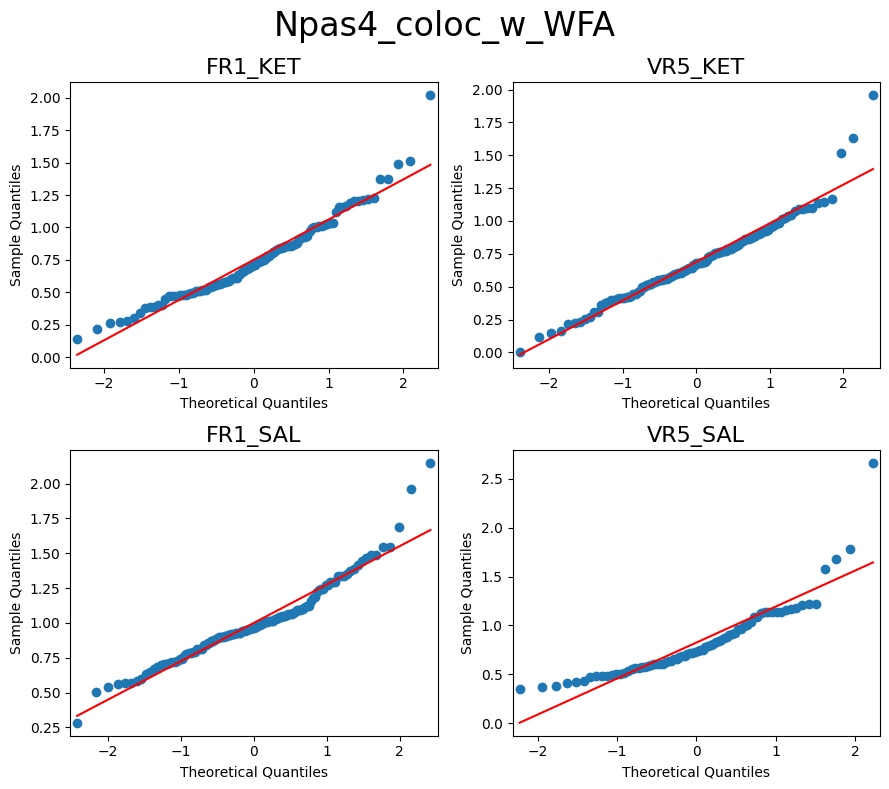

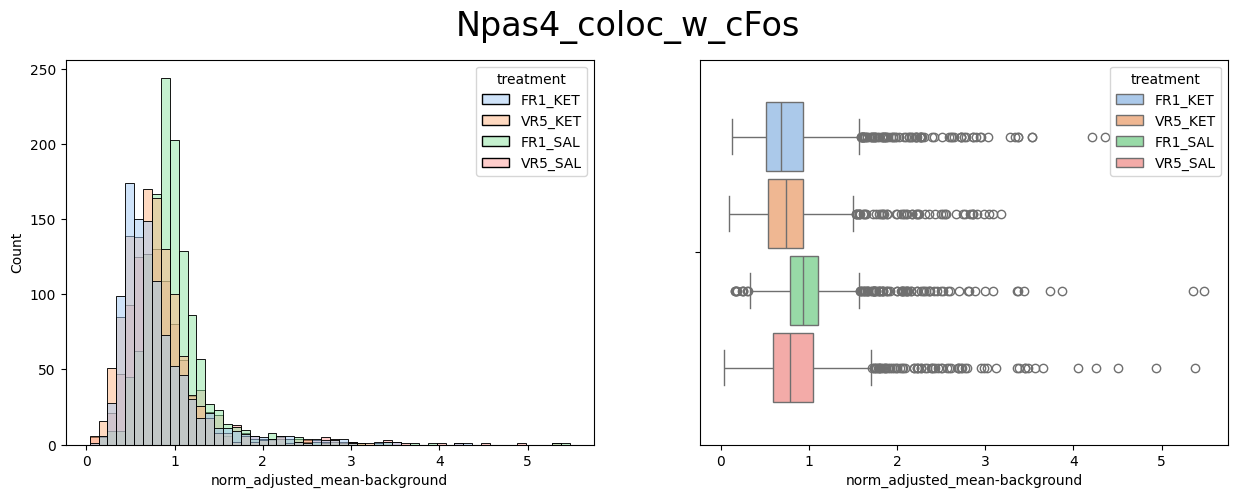

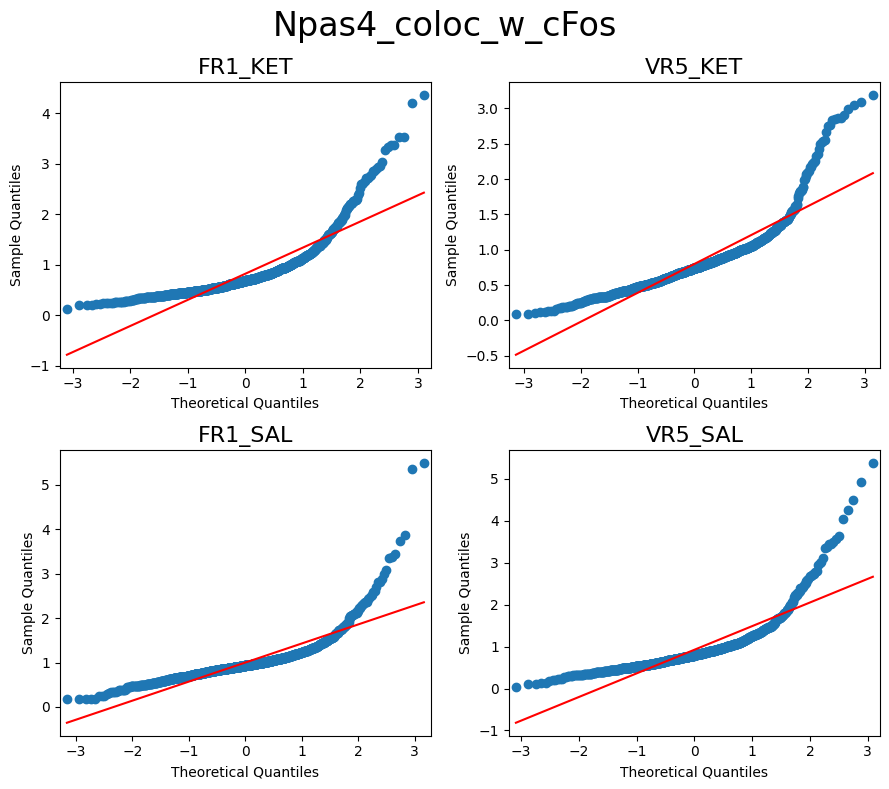

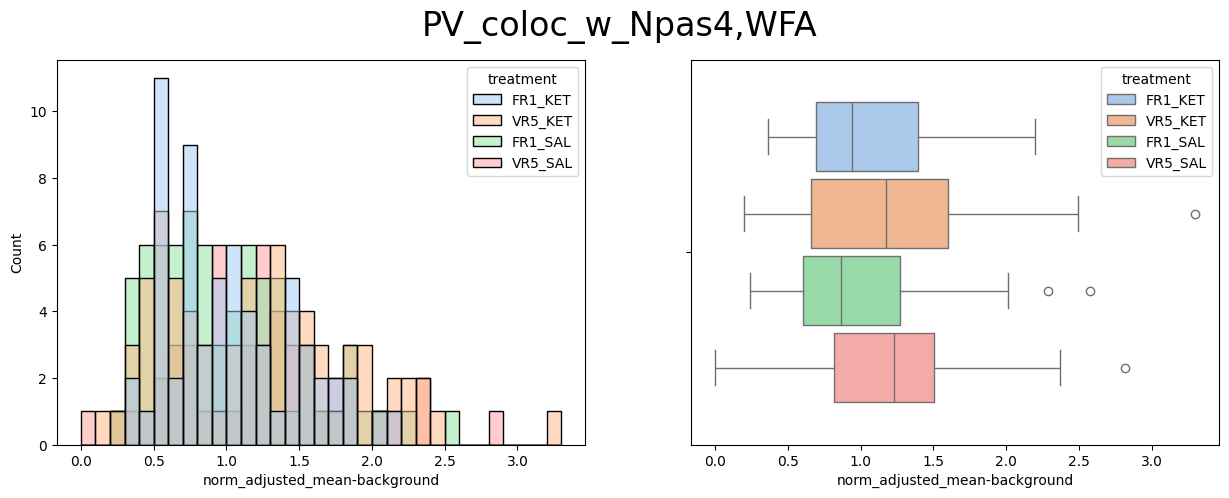

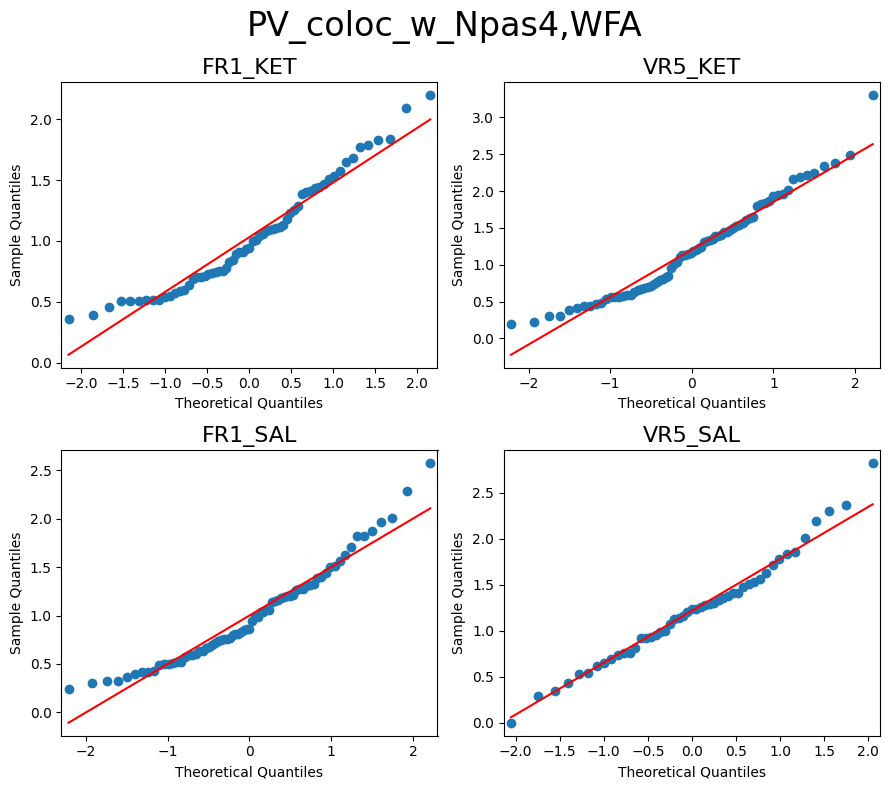

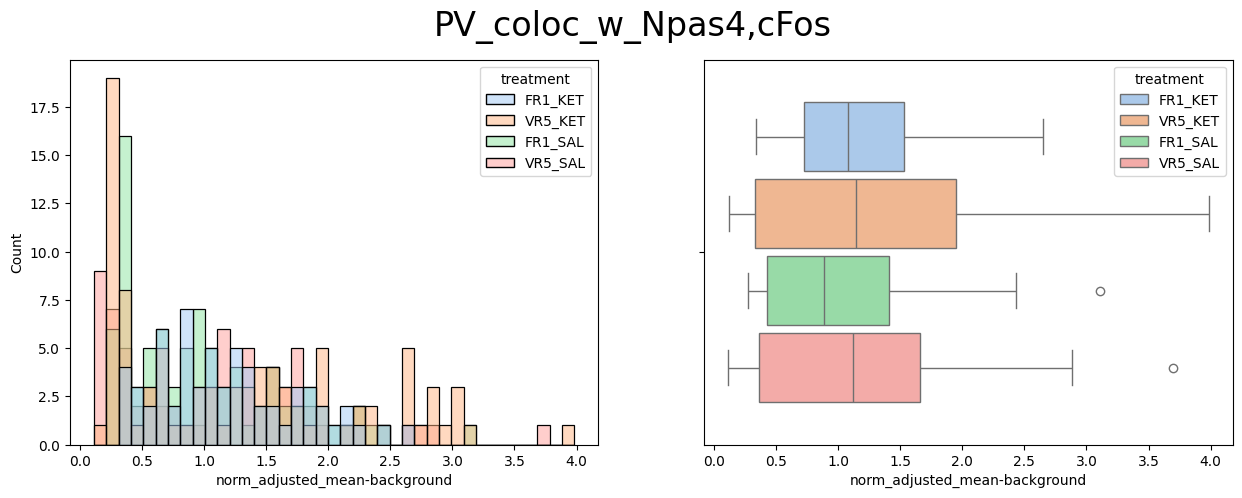

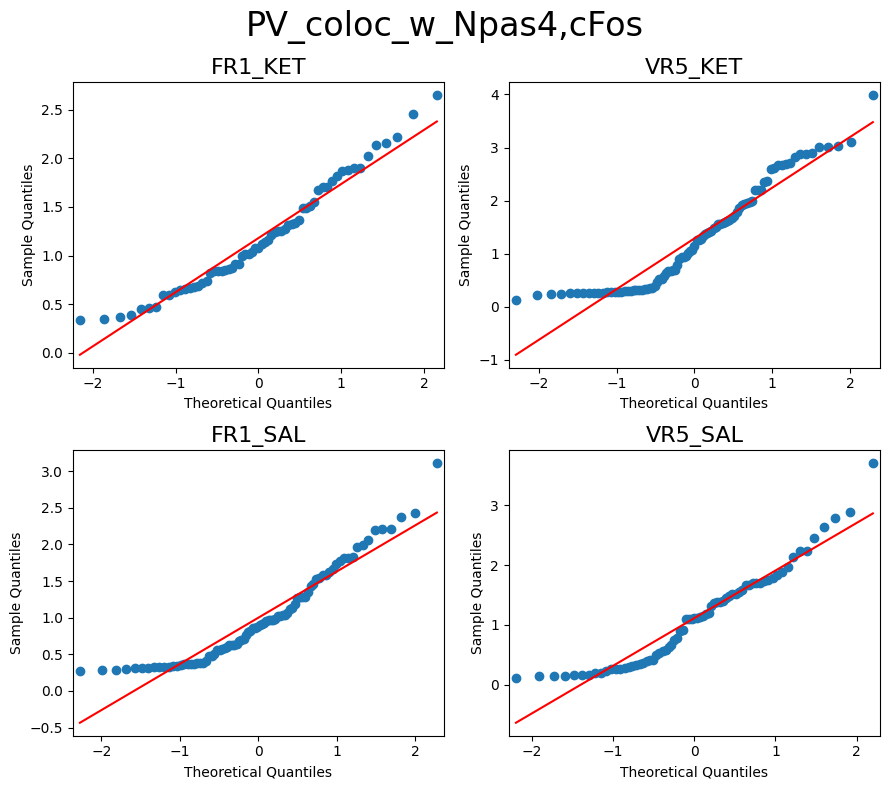

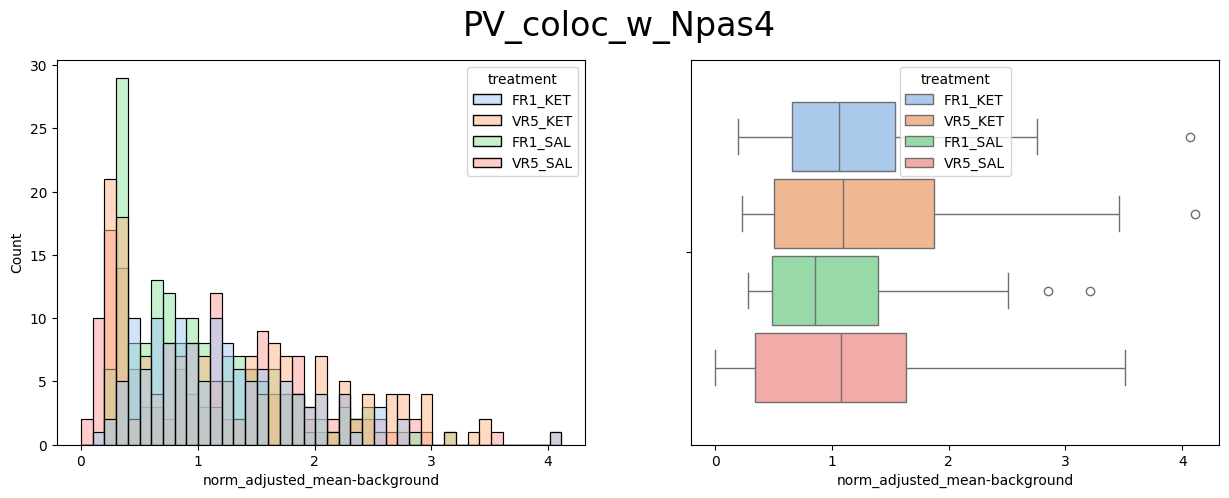

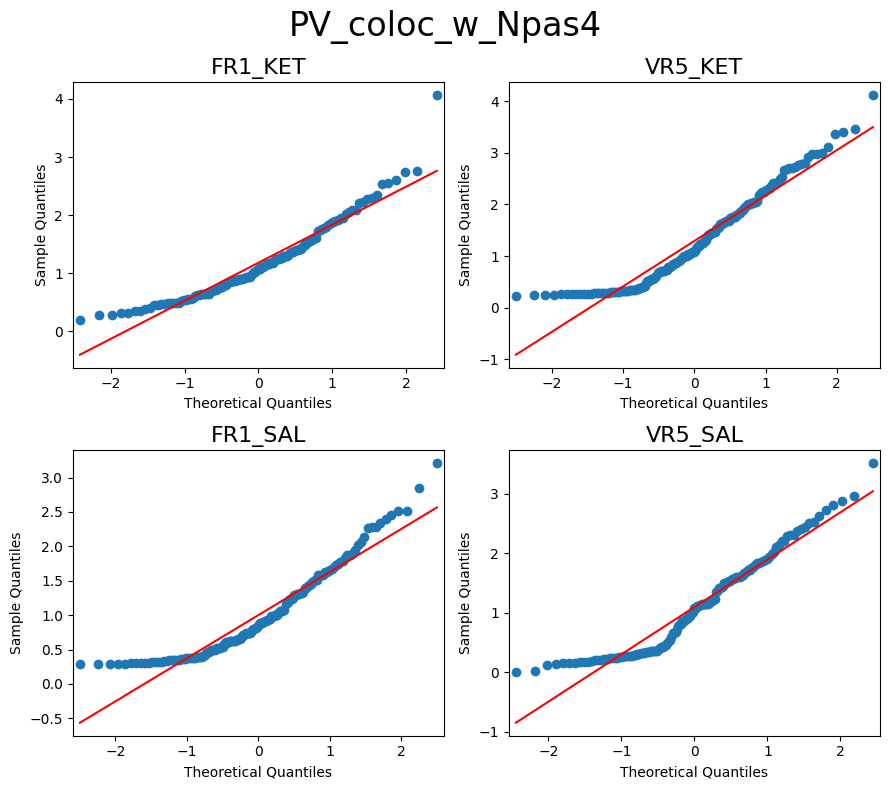

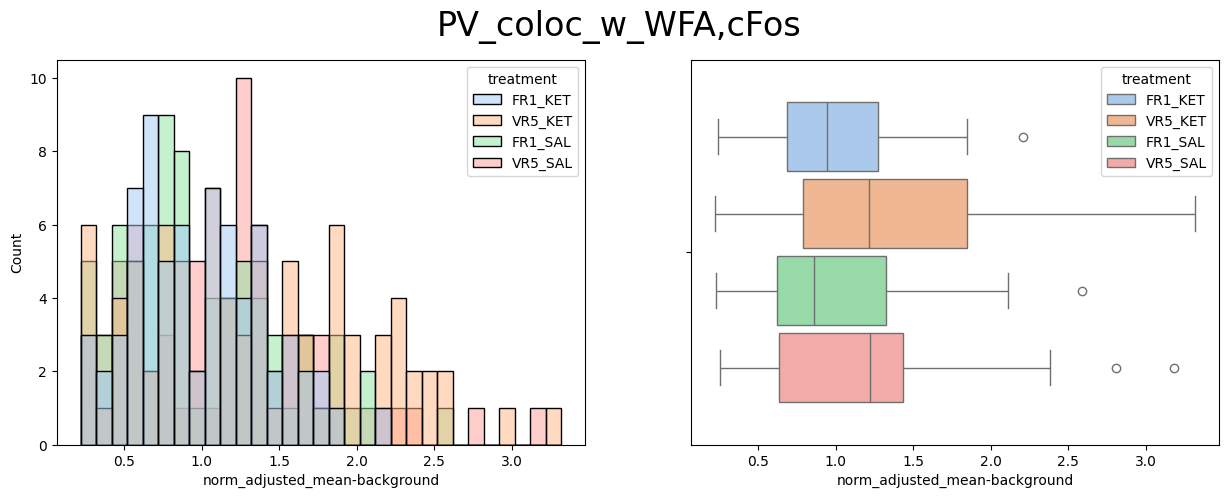

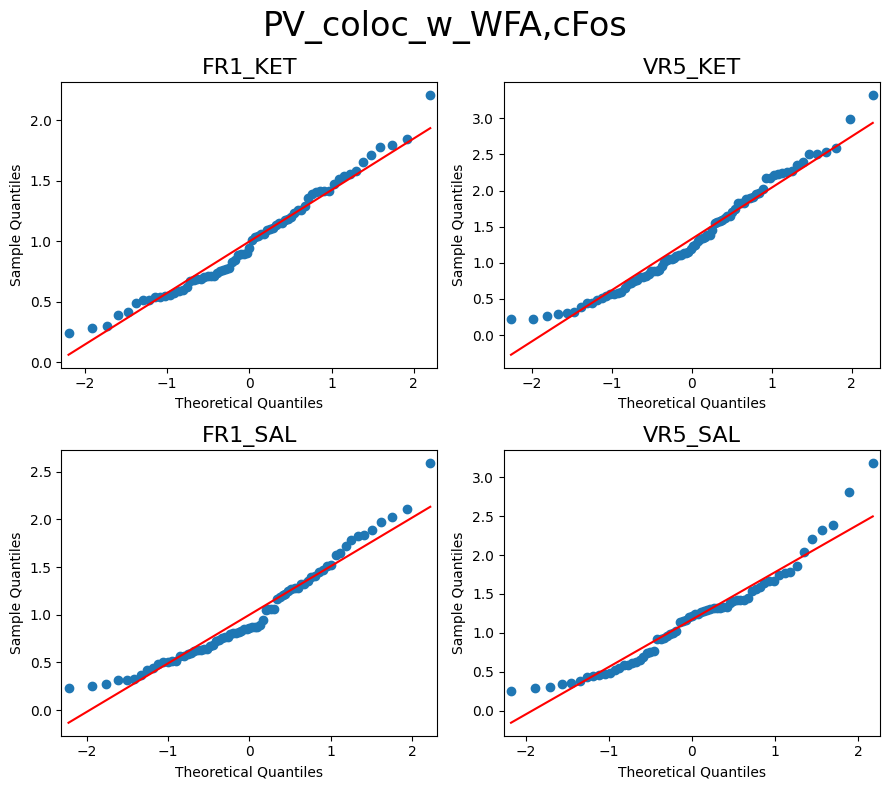

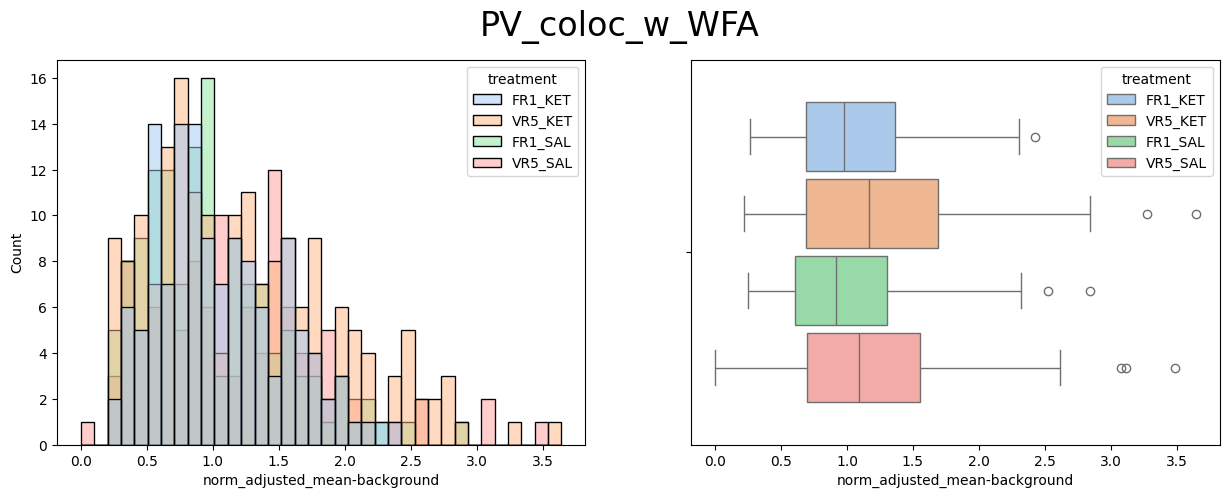

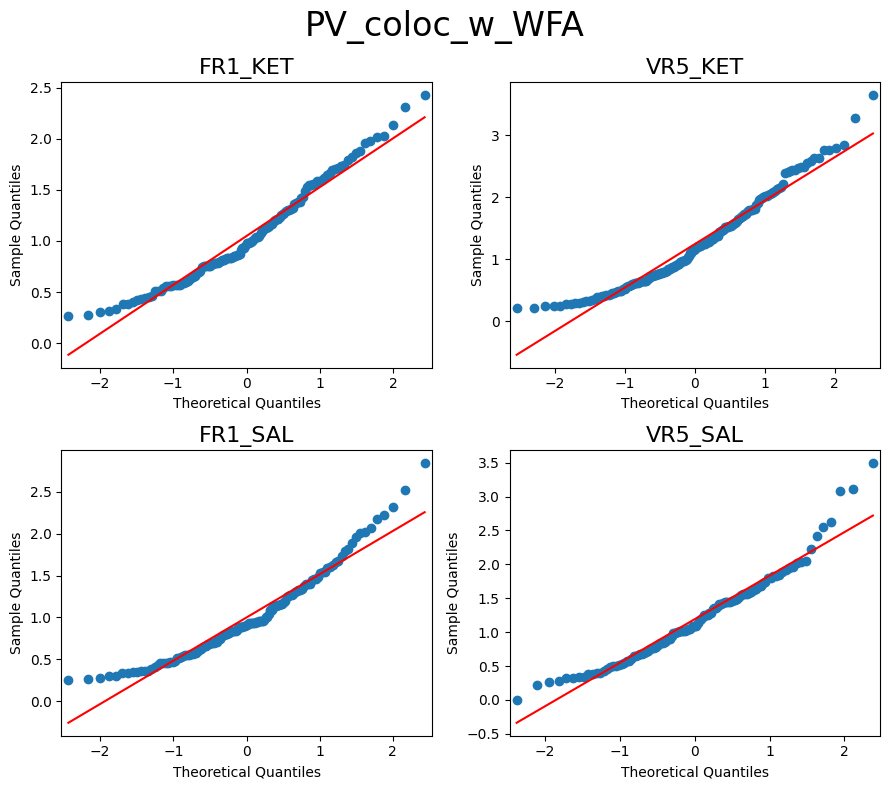

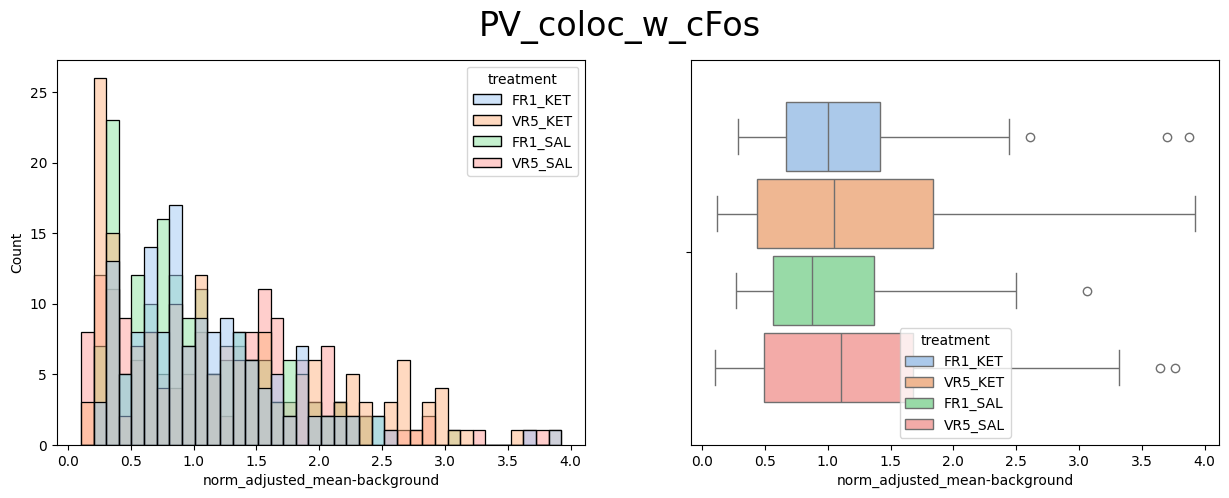

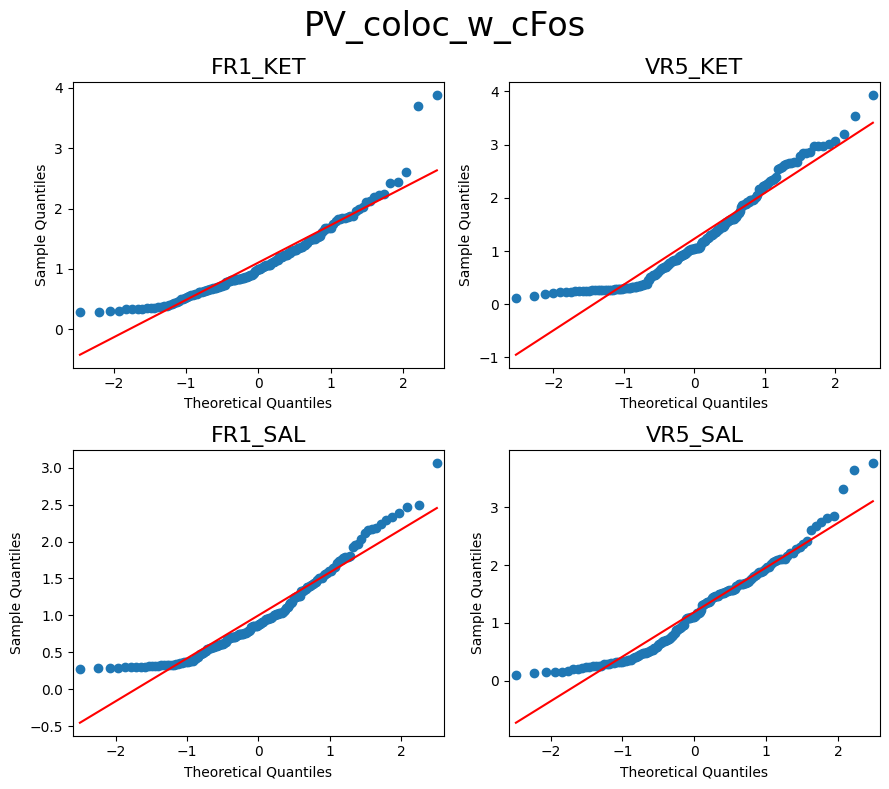

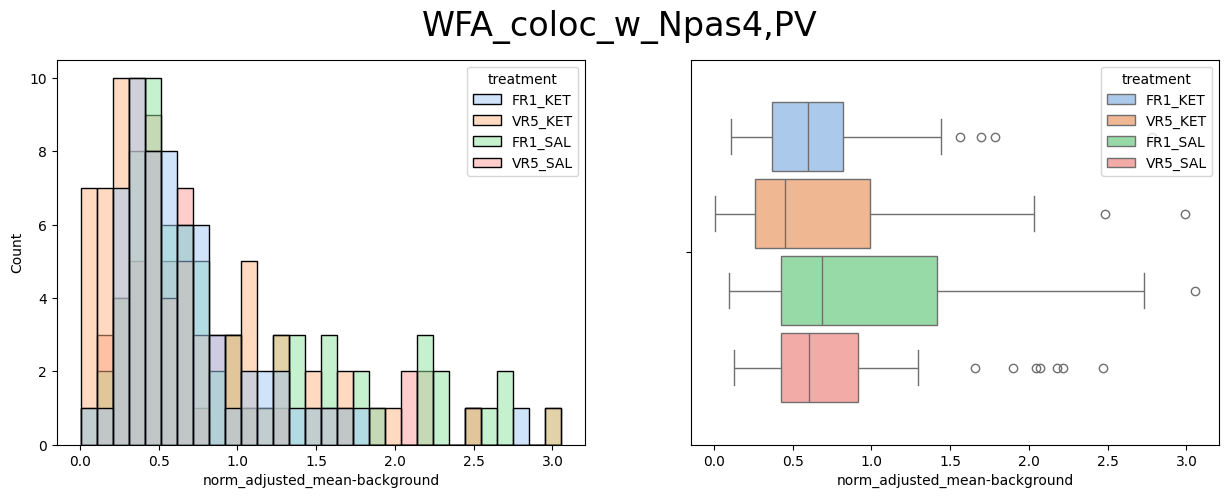

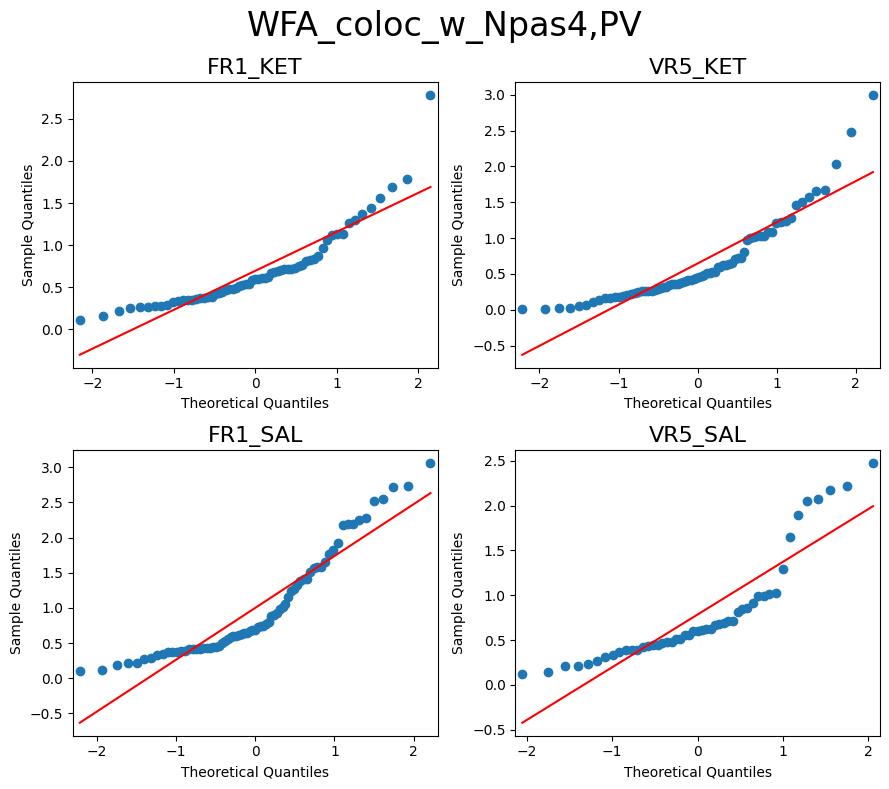

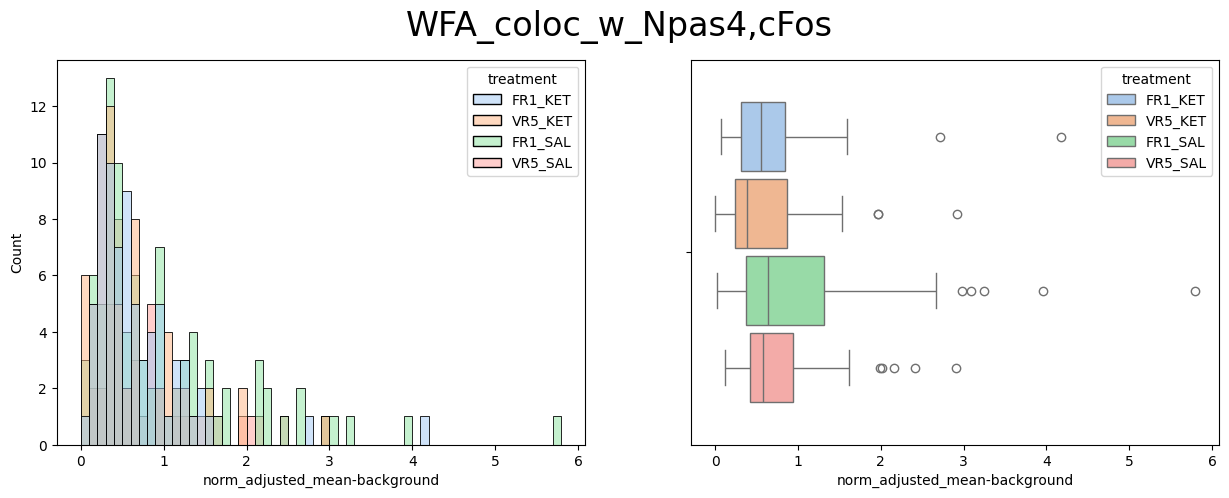

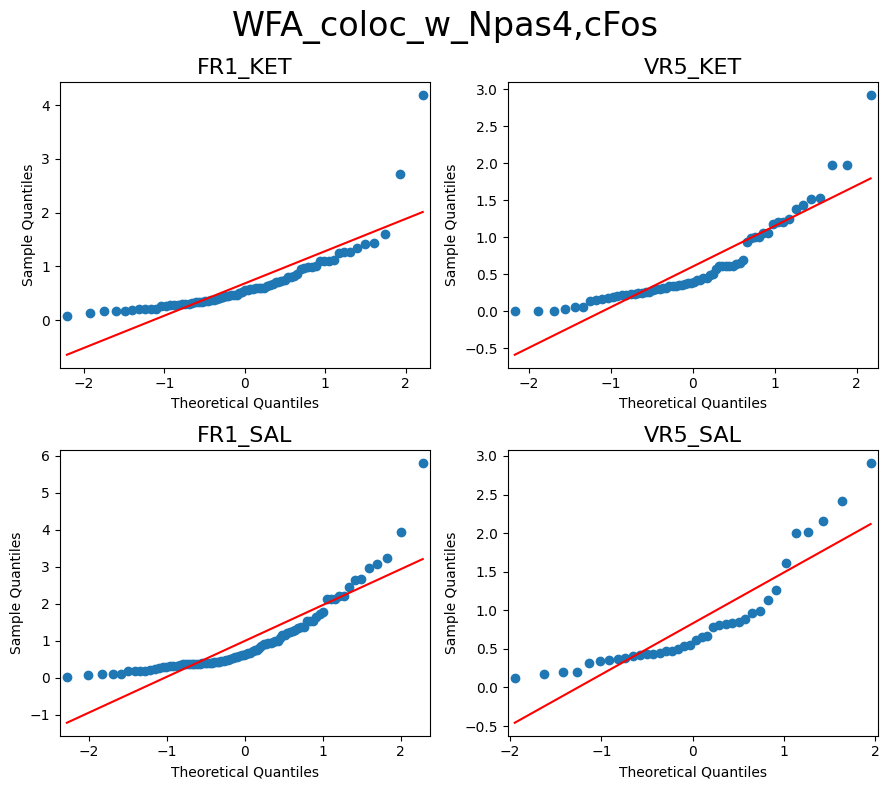

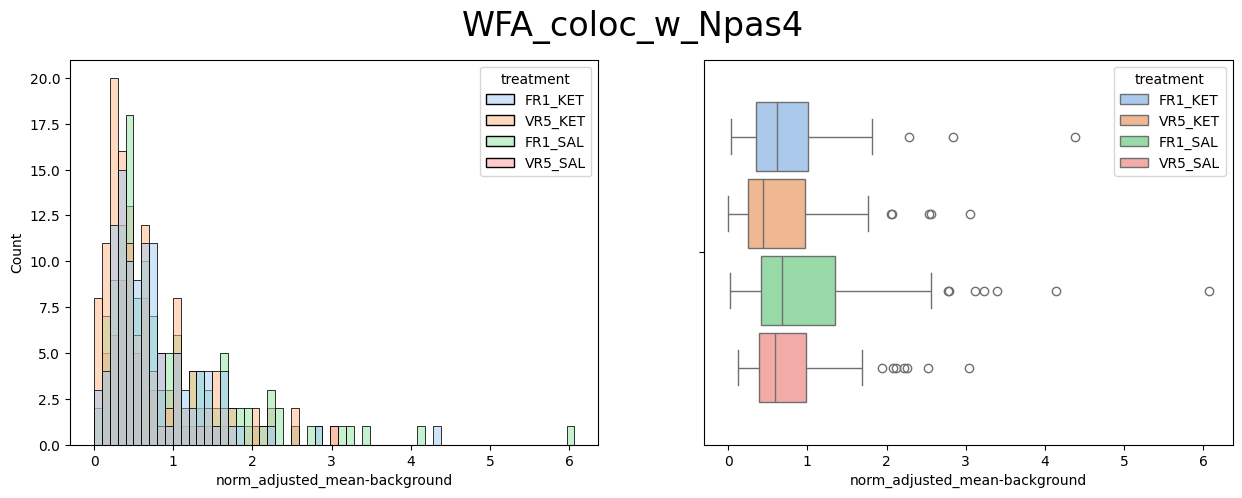

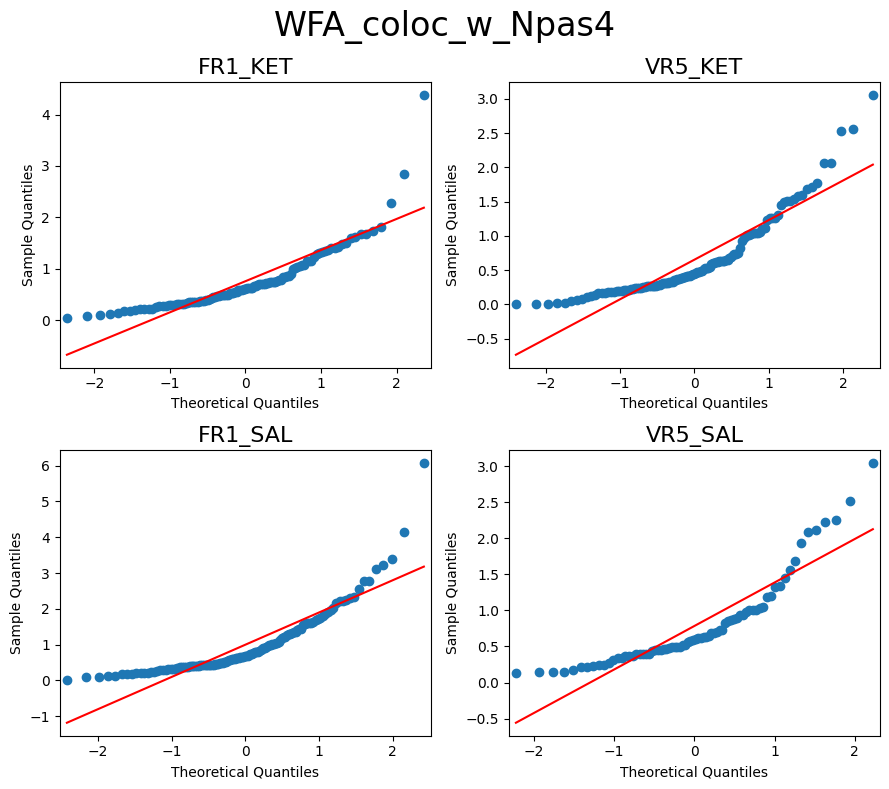

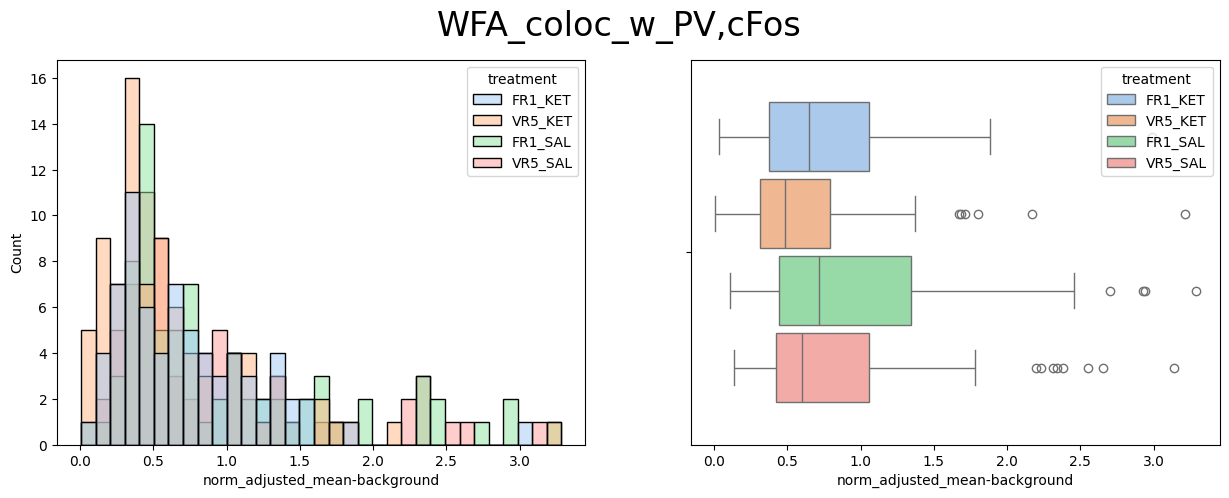

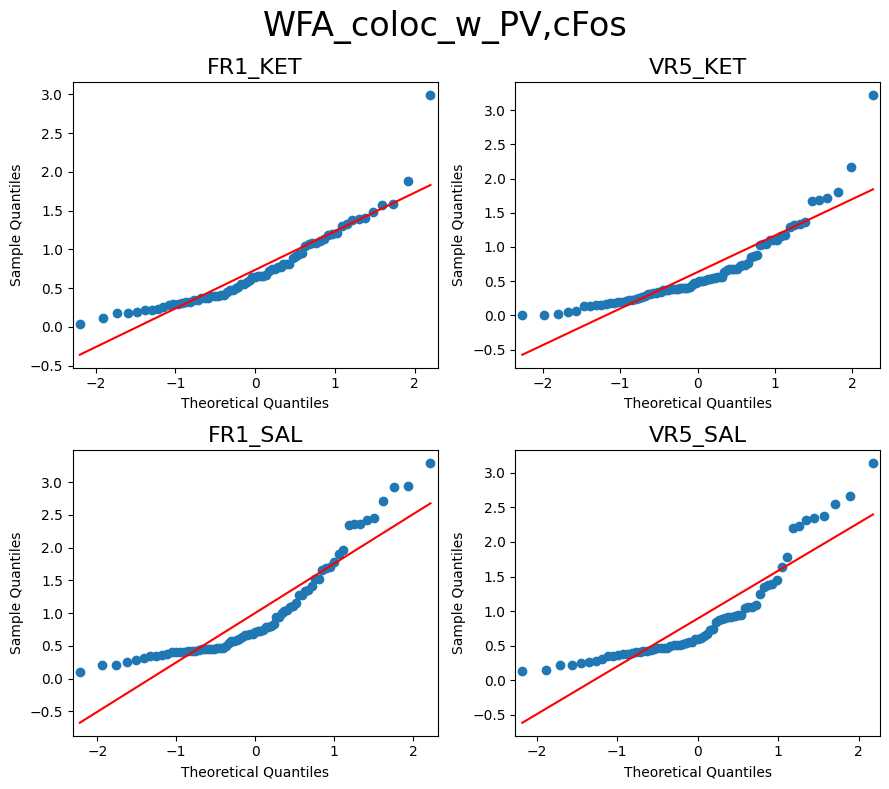

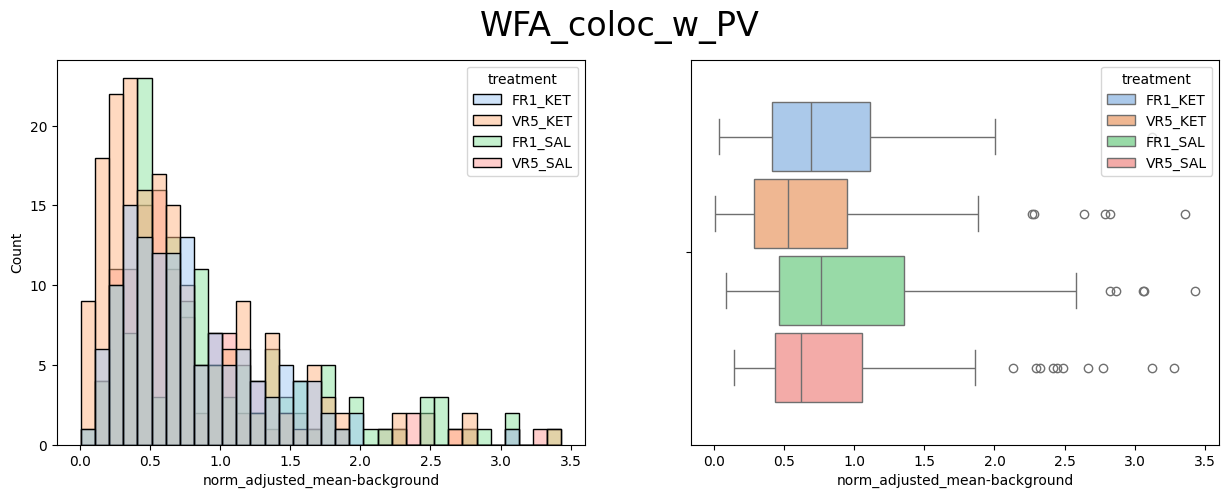

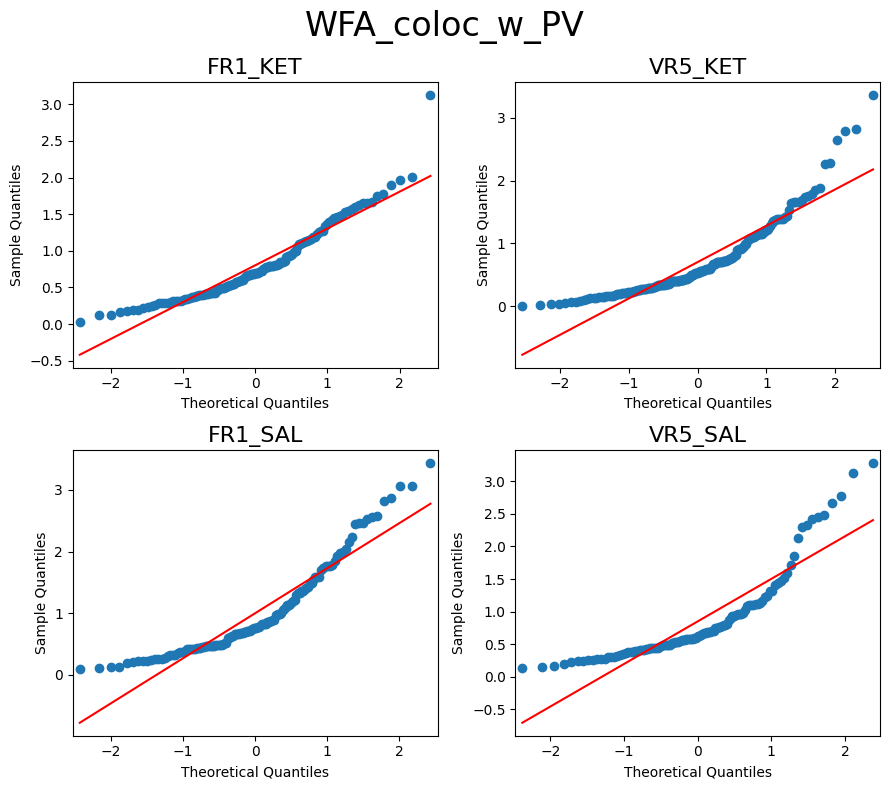

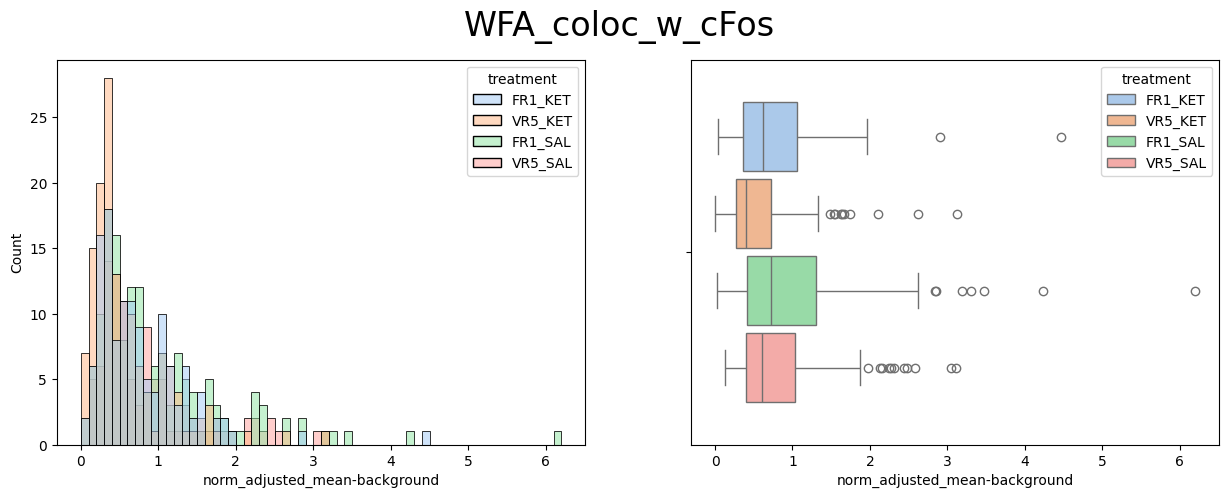

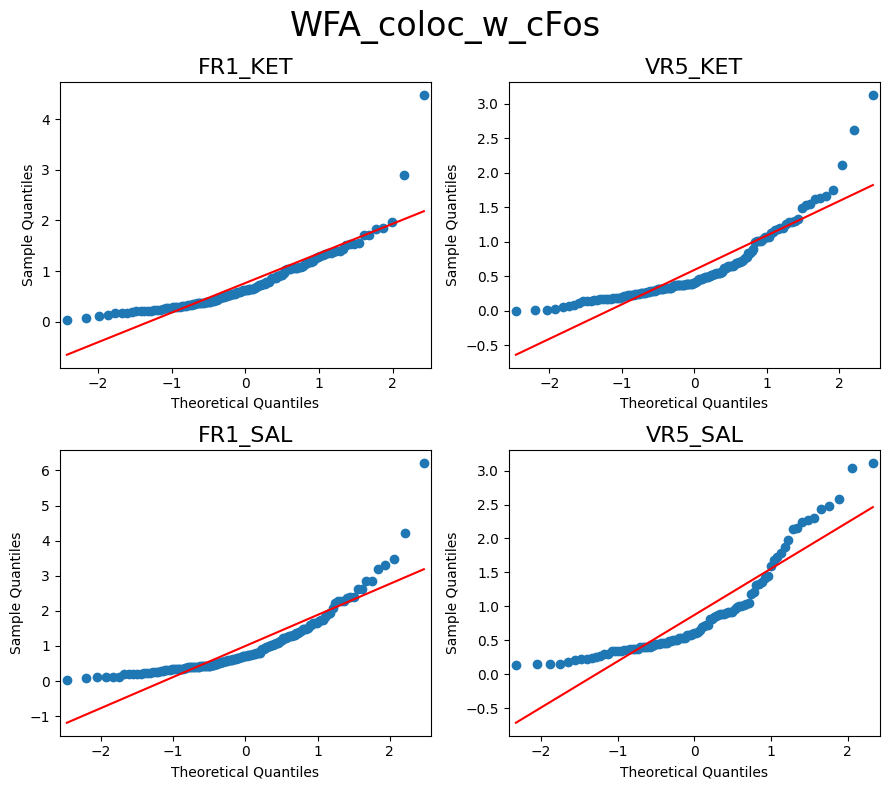

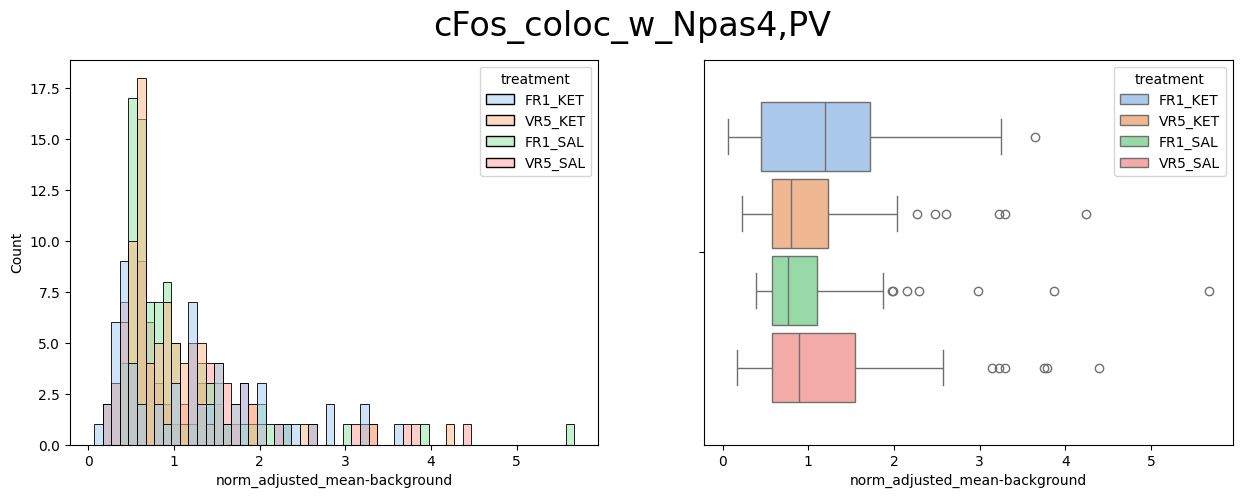

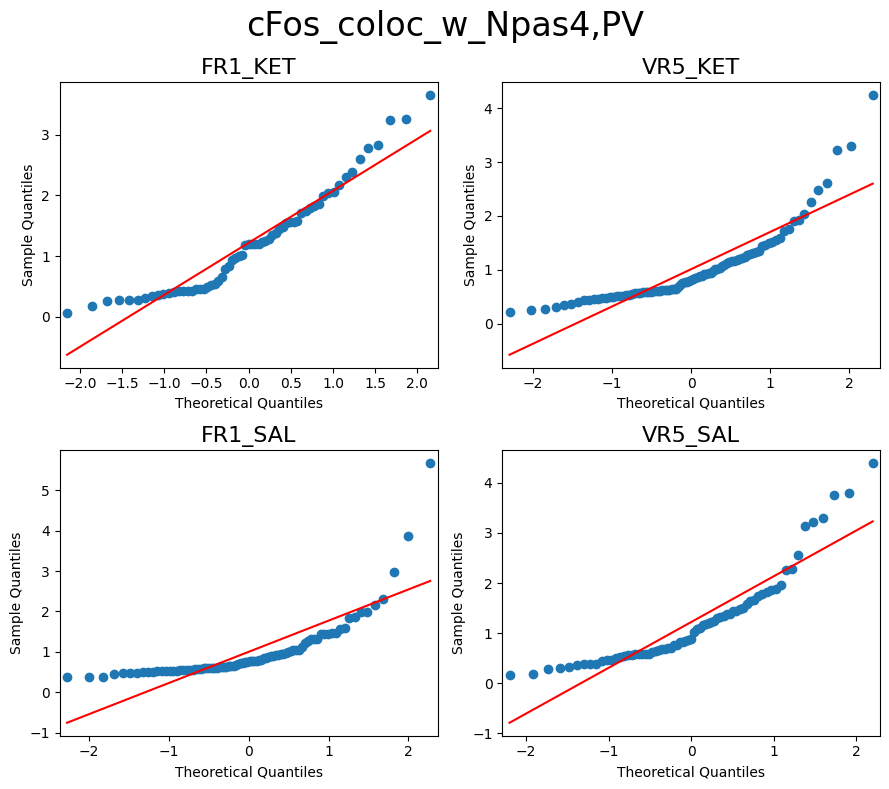

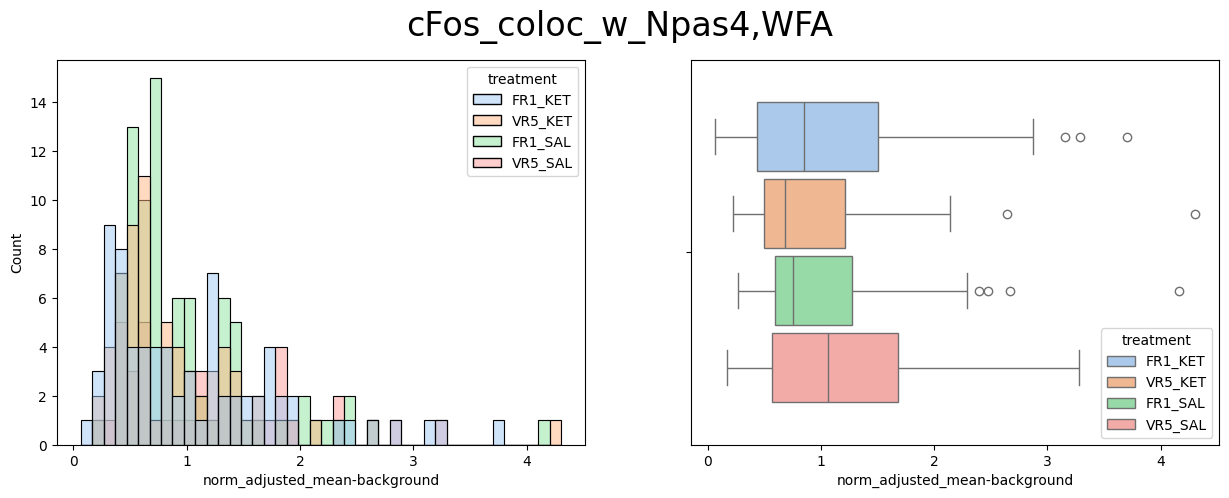

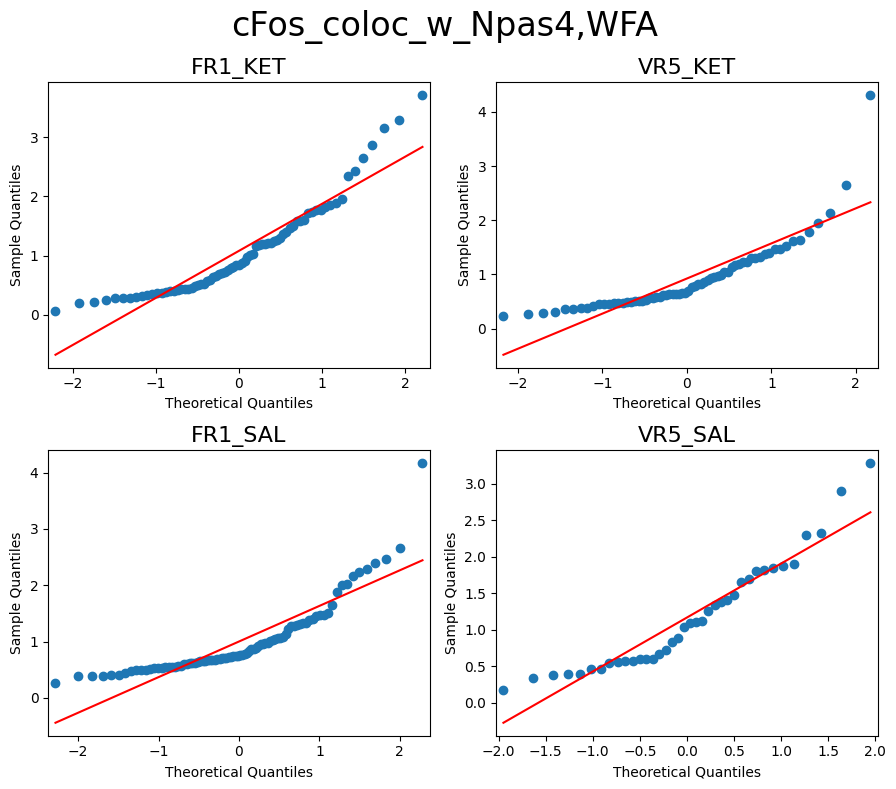

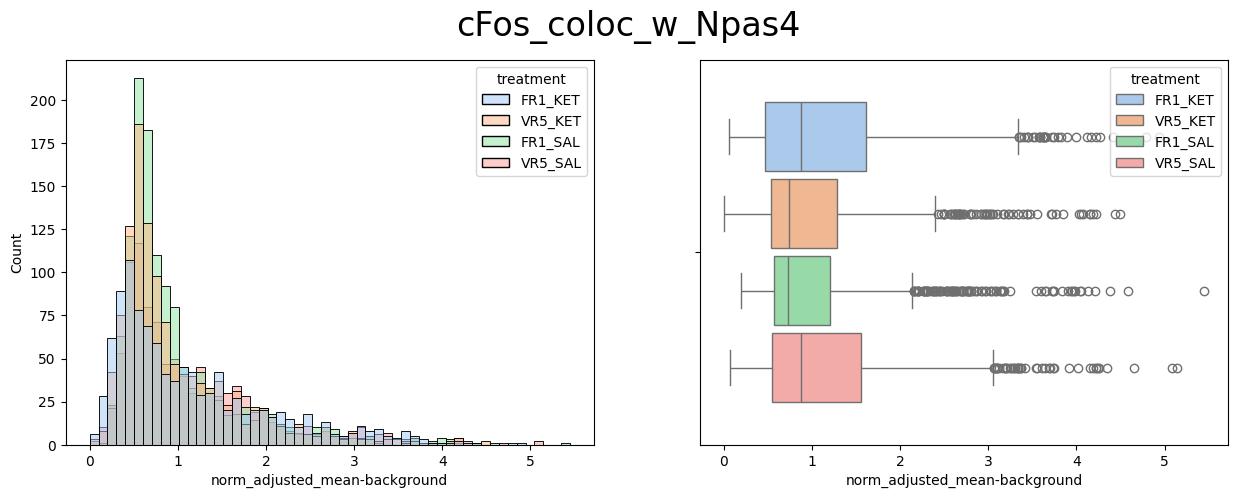

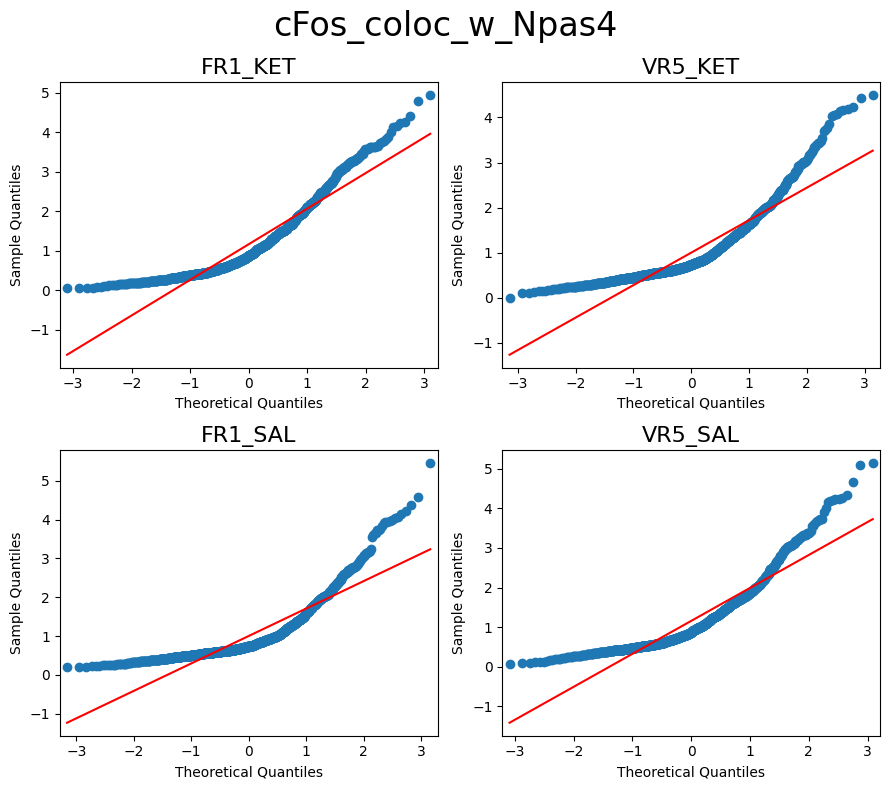

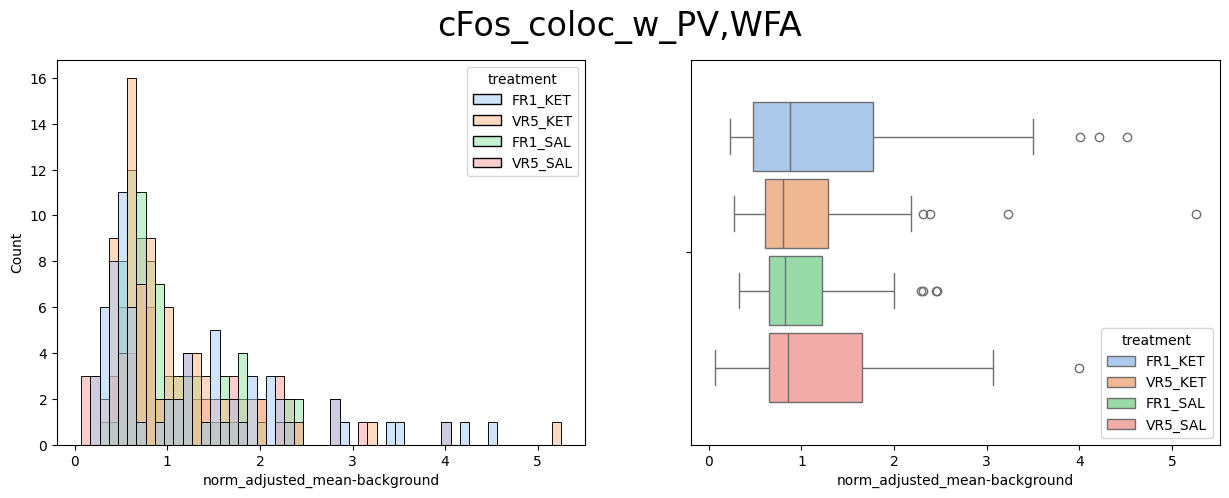

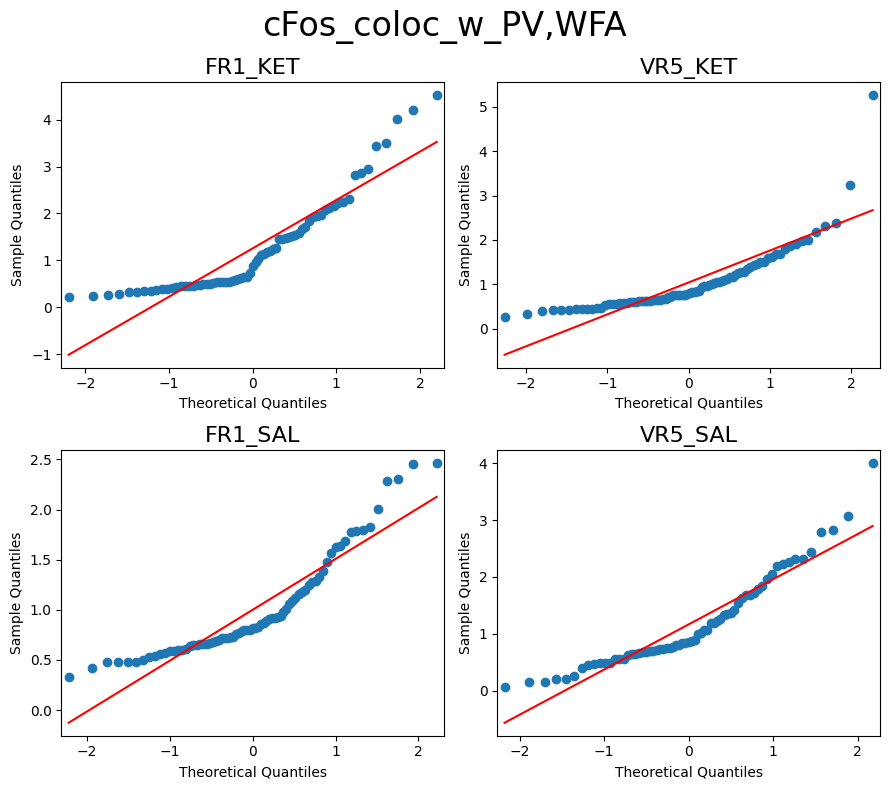

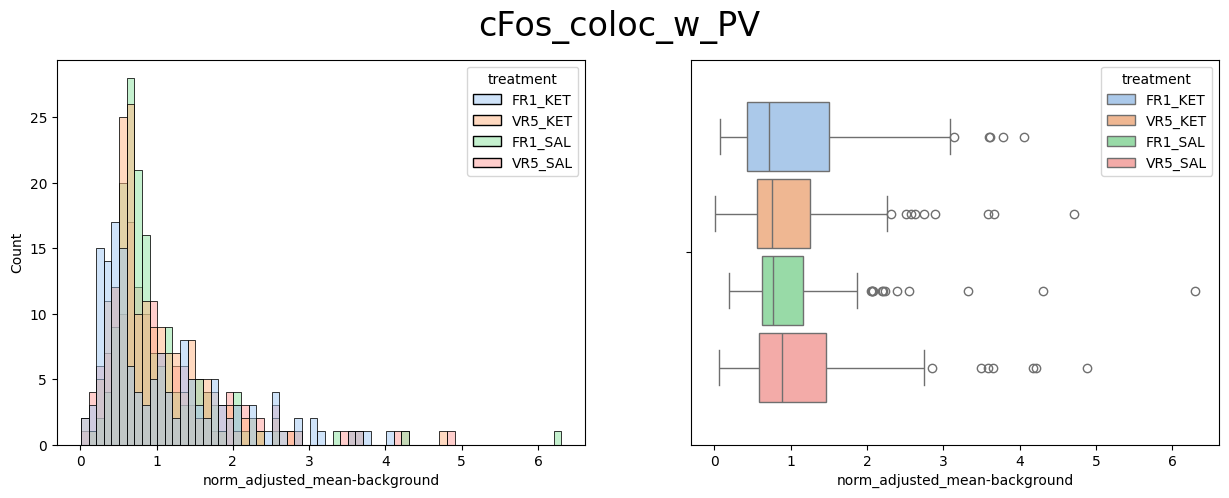

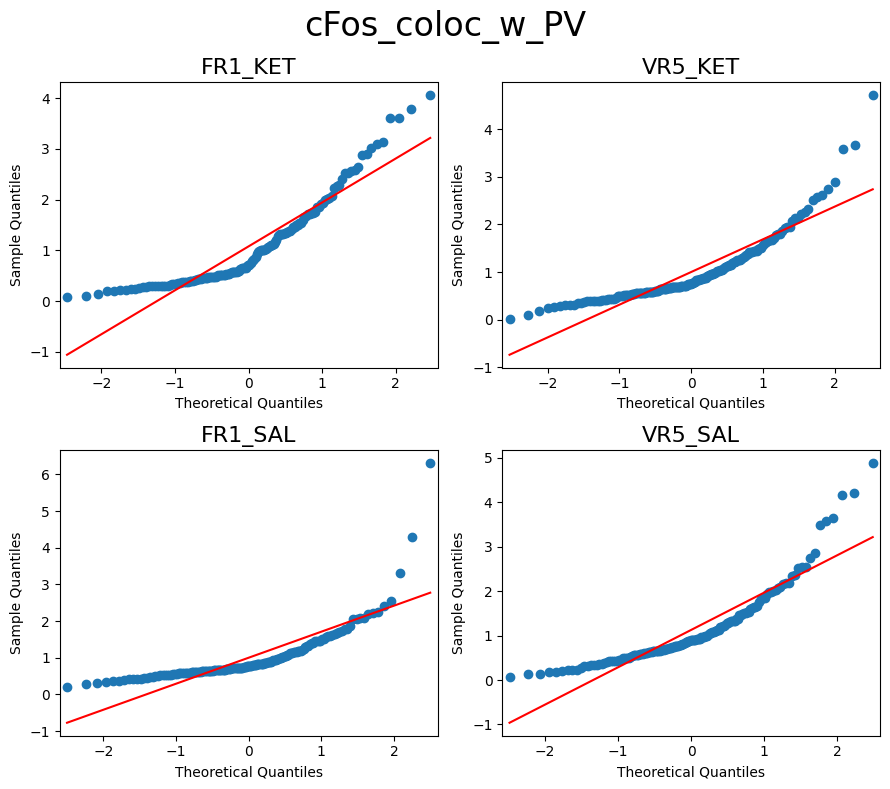

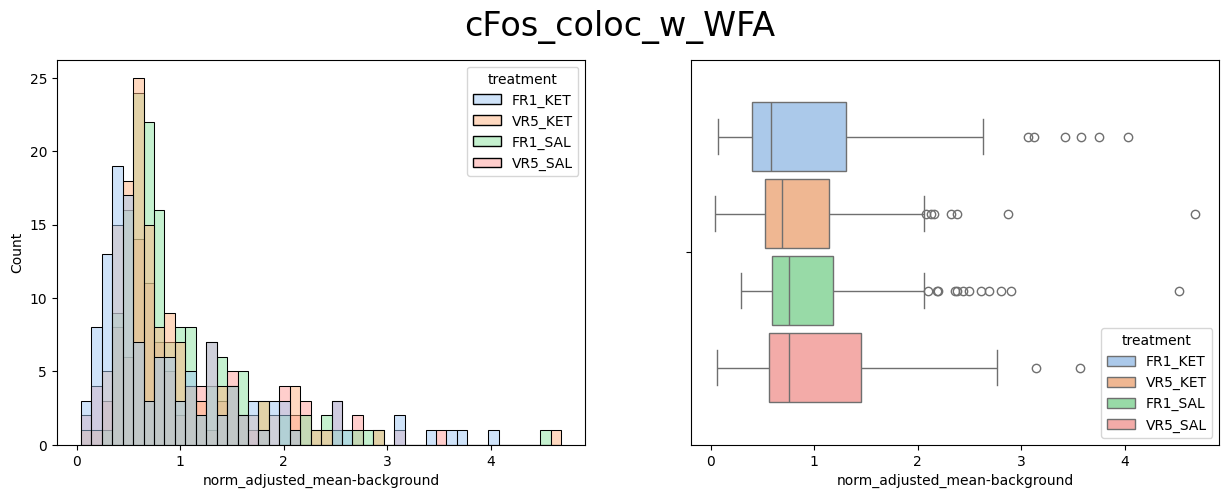

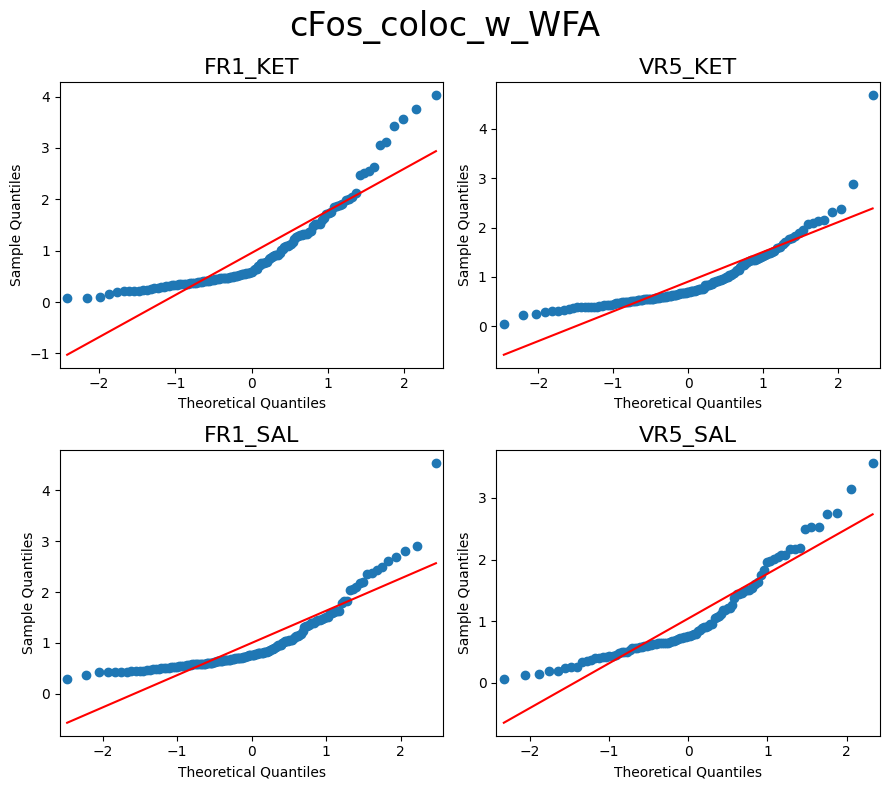

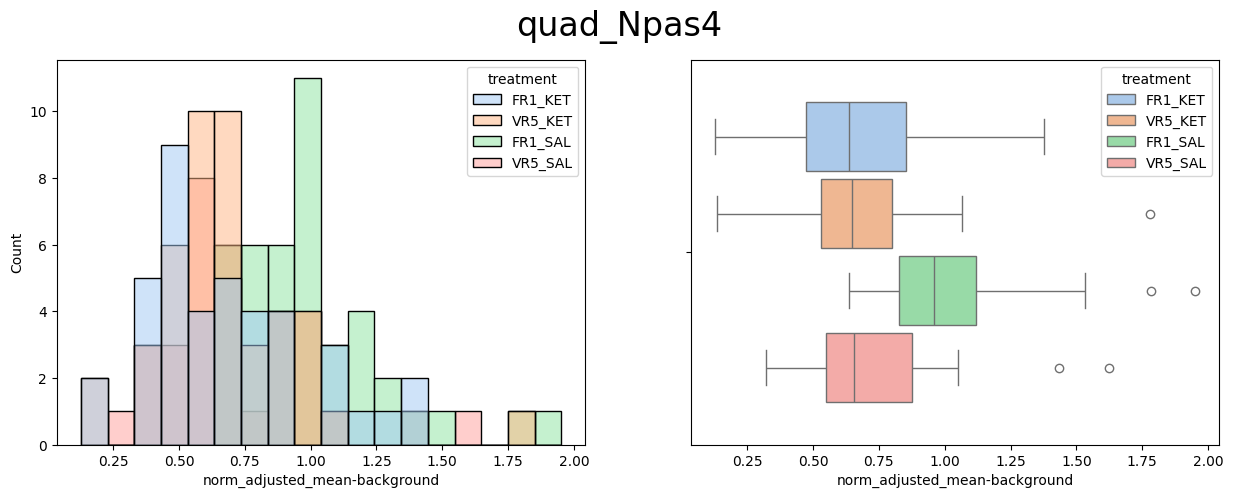

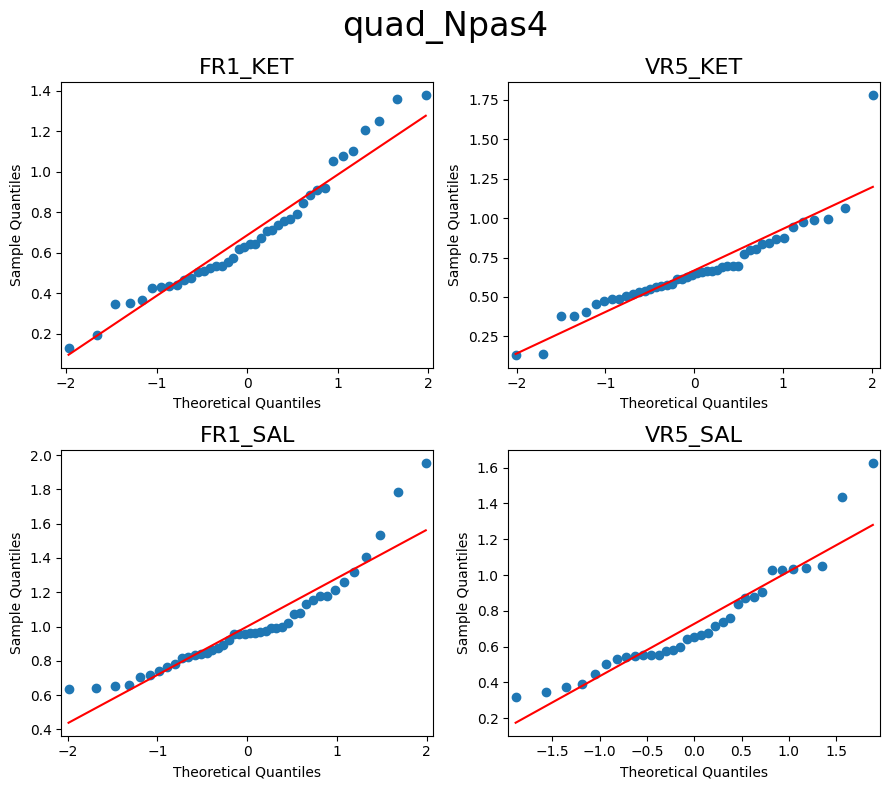

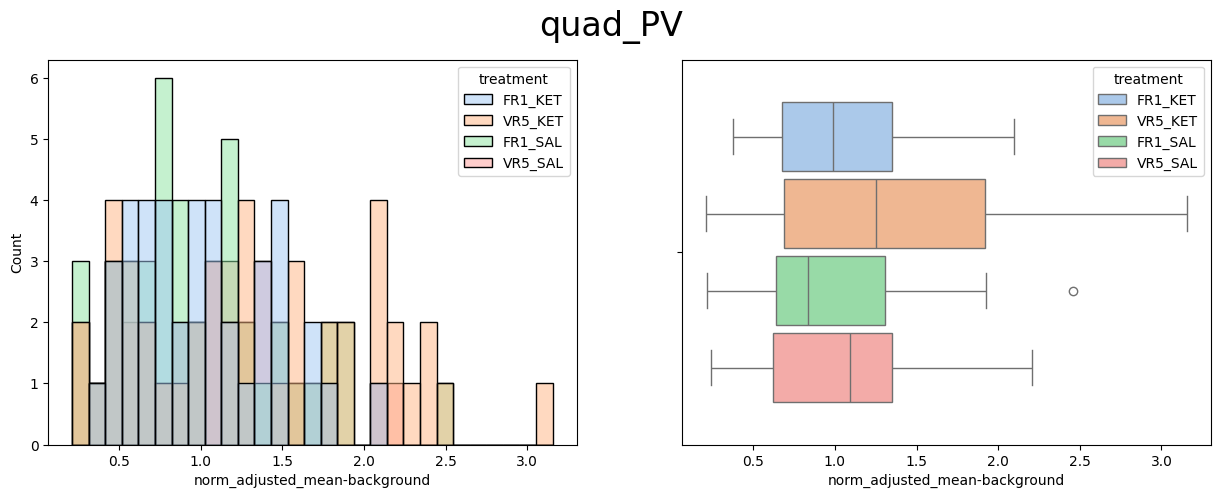

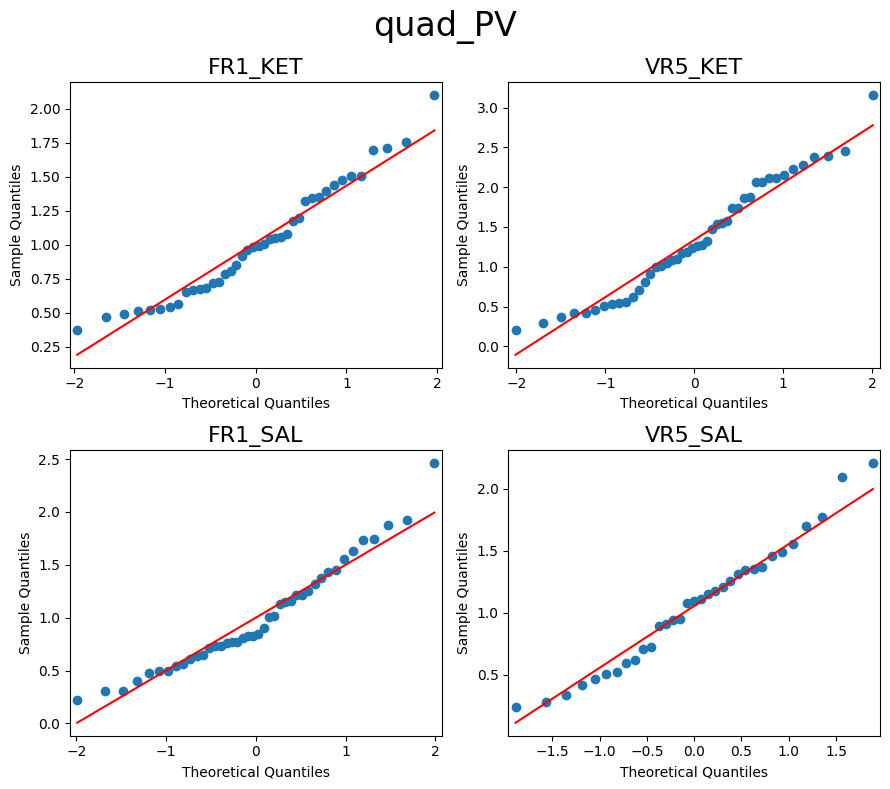

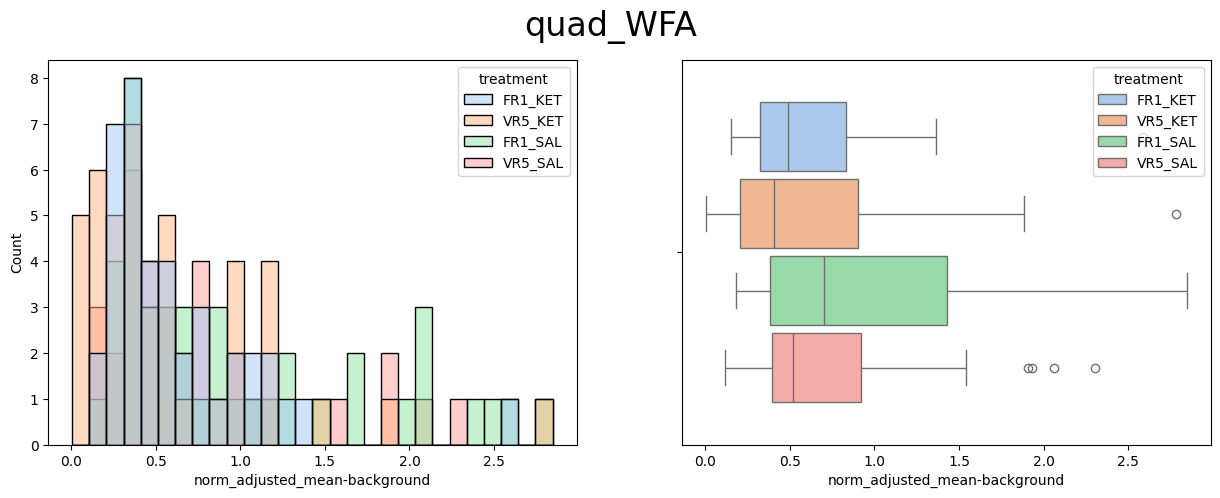

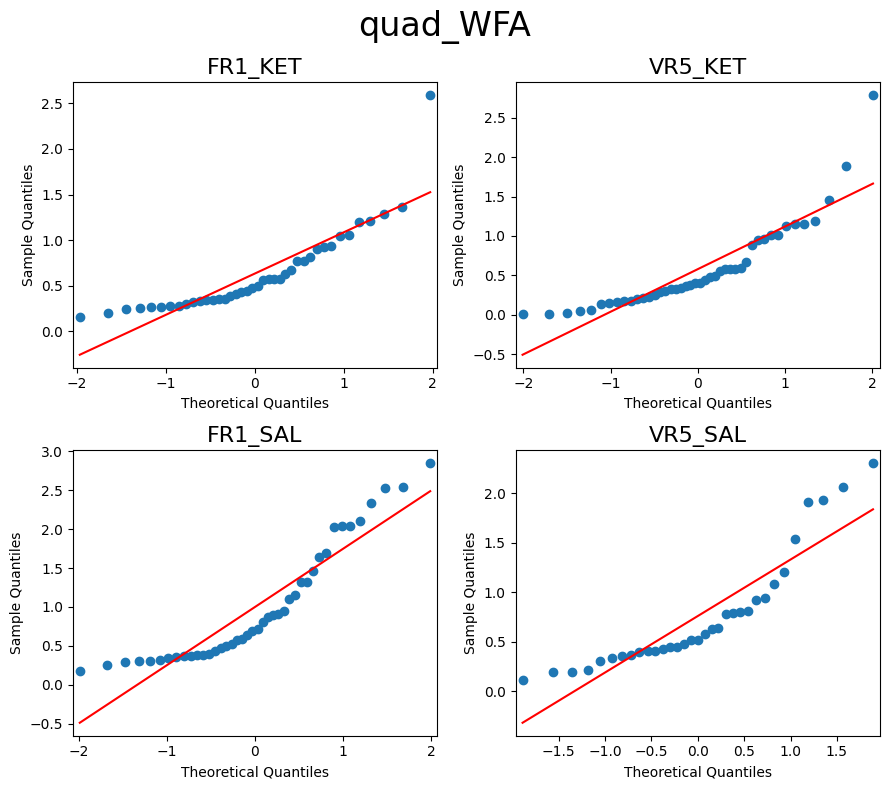

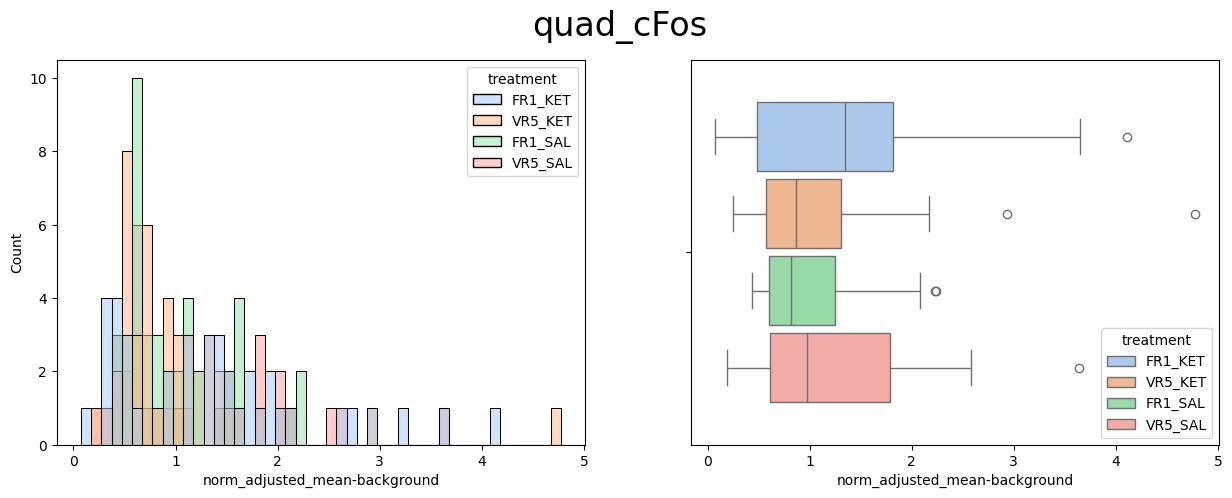

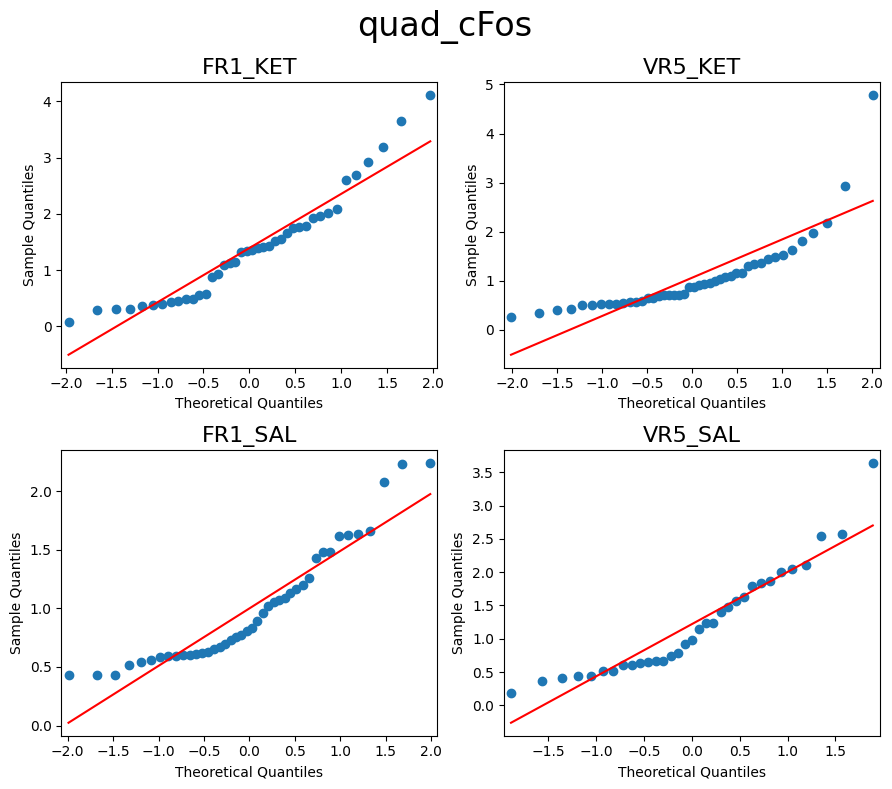

In [4]:
for df in dfs:
    plot_dist(df)
    plot_qq(df)

# Check Normality
I think, probably, all of these will fail the Shapiro-Wilk test

In [5]:
def shapiro_bytreatment(df):
    print(f'\n\n===== {df.coloc_stain_type.unique().item()} =====')
    for tx in df.treatment.unique():
        print(f'\n--- {tx} --- ')
        print(shapiro(df[df.treatment == tx]['norm_adjusted_mean-background']))
        print(df[df.treatment == tx]['norm_adjusted_mean-background'].describe())

for df in dfs:
    shapiro_bytreatment(df)



===== Npas4_coloc_w_PV,WFA =====

--- FR1_KET --- 
ShapiroResult(statistic=0.9654971361160278, pvalue=0.07437312602996826)
count    63.000000
mean      0.739800
std       0.299023
min       0.135969
25%       0.504967
50%       0.686945
75%       0.956265
max       1.469017
Name: norm_adjusted_mean-background, dtype: float64

--- VR5_KET --- 
ShapiroResult(statistic=0.9430275559425354, pvalue=0.0022859987802803516)
count    74.000000
mean      0.651413
std       0.289064
min       0.115312
25%       0.483723
50%       0.634977
75%       0.820519
max       1.898053
Name: norm_adjusted_mean-background, dtype: float64

--- FR1_SAL --- 
ShapiroResult(statistic=0.9200804829597473, pvalue=0.0001947178243426606)
count    73.000000
mean      1.000000
std       0.291874
min       0.525330
25%       0.787819
50%       0.934279
75%       1.142330
max       2.082143
Name: norm_adjusted_mean-background, dtype: float64

--- VR5_SAL --- 
ShapiroResult(statistic=0.8137882947921753, pvalue=2.23508322